# Analiza sportowa - Analiza Danych
## Projekt realizowany w ramach przedmiotu: Metody Przetwarzania Dużych Ilości Danych
### Grupa projektowa:
+  Filip Kozak
+  Maciej Grzela
+  Paweł Owczarek
+  Szymon Tusznio

### Zaimportowanie wykorzystywanych bibliotek oraz konfiguracja wyświetlania zbiorów danych dla biblioteki Pandas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import collections
from datetime import datetime
from IPython.display import display, HTML
from scipy.stats import kde
import seaborn as sn
import statistics

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 320)
pd.reset_option("display.max_rows")

css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

### Wczytanie danych z pliku csv oraz zapisanie ich do struktury DataFrame dostępnej w ramach biblioteki Pandas

In [ ]:
transfer_df = pd.read_csv(
    'csv/transfers-data-frame-cleared.csv',
    sep=',',
    header=0,
    index_col=0,
)

transfer_df = transfer_df.fillna("")

### Wyświetlenie szczegółów dotyczących zbioru danych

In [ ]:
display(transfer_df.head(10))
display(transfer_df.shape)
display(transfer_df.info())
display(transfer_df.describe())

,Club,ClubLeagueLevel,ClubLeagueNationality,Player,PlayerAge,PlayerHeight,TransferDate,PlayerMatchesPlayed,PlayerGoals,PlayerAssists,PlayerOwnGoals,PlayerSubstitutionIn,PlayerSubstitutionOut,PlayerYellowCards,PlayerSecondYellowCards,PlayerRedCards,PlayerMinutesPlayed,PlayerPosition,PlayerPositionScut,PlayerNationality,Operation,Bought/Sold,PlayerMarketValue,ClubAssigned,ClubAssignedLeagueLevel,ClubAssignedLeagueNationality,TransferValue,PlayerWithoutClub,PlayerGenericPosition,PlayerAgeGroup
0,Legia Warszawa,1,Polska,Ernest Muci,19,1.80,2021-02-23,94,24,6,0,41,26,6,0,0,5004,Środkowy napastnik,ŚNP,Albania,Transfer,Kupiony,1000000,KF Tirana,1,Albania,500000,False,Napastnik,Młody
1,Legia Warszawa,1,Polska,Josip Juranovic,24,1.73,2021-08-21,224,8,23,3,23,12,18,0,1,18428,Prawy obrońca,POB,Chorwacja,Transfer,Kupiony,2500000,HNK Hajduk Split,1,Chorwacja,400000,False,Obrońca,W sile wieku
2,Legia Warszawa,1,Polska,Jasur Yakhshiboev,23,1.80,2021-08-30,103,23,13,0,50,31,14,0,0,5086,Prawy napastnik,PNP,Uzbekistan,Transfer,Kupiony,700000,Pakhtakor Tashkent,1,Uzbekistan,300000,False,Napastnik,W sile wieku
3,Legia Warszawa,1,Polska,Rafa Lopes,29,1.85,2020-08-01,375,75,19,1,123,120,41,0,1,23321,Ofensywny pomocnik,OPM,Portugalia,Transfer,Kupiony,500000,Cracovia,1,Polska,150000,False,Pomocnik,W sile wieku
4,Legia Warszawa,1,Polska,Bartosz Kapustka,23,1.79,2020-08-13,151,20,19,0,36,54,25,0,1,10003,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,1500000,Leicester City,1,Anglia,0,False,Pomocnik,W sile wieku
5,Legia Warszawa,1,Polska,Artur Boruc,40,1.93,2020-08-01,565,1,0,1,2,6,36,0,0,50650,Bramkarz,BRK,Polska,Transfer,Kupiony,50000,AFC Bournemouth,2,Anglia,0,False,Bramkarz,Zbliżający się do końca kariery
6,Legia Warszawa,1,Polska,Filip Mladenovic,28,1.80,2020-07-21,342,22,48,1,32,41,80,0,2,27869,Lewy obrońca,LOB,Serbia,Transfer,Kupiony,2500000,Lechia Gdańsk,1,Polska,0,False,Obrońca,W sile wieku
7,Legia Warszawa,1,Polska,Michal Karbownik,19,1.75,2021-08-28,121,0,14,0,15,19,14,0,1,9672,Prawy obrońca,POB,Polska,Wypożyczenie,Kupiony,5000000,Brighton & Hove Albion,1,Anglia,0,False,Obrońca,Młody
8,Legia Warszawa,1,Polska,Joel Valencia,25,1.64,2019-07-31,217,12,11,0,84,74,19,0,0,12278,Lewy napastnik,LNP,Ekwador,Wypożyczenie,Kupiony,400000,FC Brentford,1,Anglia,0,False,Napastnik,W sile wieku
9,Legia Warszawa,1,Polska,Bartlomiej Ciepiela,19,1.82,2020-11-21,95,13,9,0,27,42,25,3,0,5707,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,0,Legia Warszawa II,4,Polska,0,False,Pomocnik,Młody


(17630, 30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17630 entries, 0 to 27109
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Club                           17630 non-null  object 
 1   ClubLeagueLevel                17630 non-null  int64  
 2   ClubLeagueNationality          17630 non-null  object 
 3   Player                         17630 non-null  object 
 4   PlayerAge                      17630 non-null  int64  
 5   PlayerHeight                   17630 non-null  float64
 6   TransferDate                   17630 non-null  object 
 7   PlayerMatchesPlayed            17630 non-null  int64  
 8   PlayerGoals                    17630 non-null  int64  
 9   PlayerAssists                  17630 non-null  int64  
 10  PlayerOwnGoals                 17630 non-null  int64  
 11  PlayerSubstitutionIn           17630 non-null  int64  
 12  PlayerSubstitutionOut          17630 non-null 

None

,ClubLeagueLevel,PlayerAge,PlayerHeight,PlayerMatchesPlayed,PlayerGoals,PlayerAssists,PlayerOwnGoals,PlayerSubstitutionIn,PlayerSubstitutionOut,PlayerYellowCards,PlayerSecondYellowCards,PlayerRedCards,PlayerMinutesPlayed,PlayerMarketValue,ClubAssignedLeagueLevel,TransferValue
count,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,1.763000e+04,17630.000000,1.763000e+04
mean,1.132218,24.710380,1.816820,172.559955,22.140896,13.105956,0.332672,37.542484,40.477425,23.286727,0.689620,0.658026,12159.984118,1.738286e+06,1.816733,5.464941e+05
std,0.450184,4.157618,0.069364,114.459166,30.600317,17.254821,0.772194,32.351002,38.048891,20.889660,1.157749,1.047655,8791.845997,4.685897e+06,1.453749,3.306832e+06
min,1.000000,15.000000,1.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,1.000000,21.000000,1.770000,86.000000,3.000000,2.000000,0.000000,13.000000,12.000000,8.000000,0.000000,0.000000,5539.000000,2.000000e+05,1.000000,0.000000e+00
50%,1.000000,24.000000,1.820000,150.000000,11.000000,7.000000,0.000000,29.000000,30.000000,17.000000,0.000000,0.000000,10179.500000,4.250000e+05,1.000000,0.000000e+00
75%,1.000000,28.000000,1.870000,237.000000,29.000000,18.000000,0.000000,54.000000,58.000000,32.000000,1.000000,1.000000,16642.000000,1.200000e+06,2.000000,0.000000e+00
max,3.000000,41.000000,2.040000,914.000000,432.000000,240.000000,8.000000,262.000000,280.000000,165.000000,11.000000,10.000000,78741.000000,8.000000e+07,8.000000,8.000000e+07


### Przypisanie typu string dla wszystkich kolumn tekstowych

In [ ]:
transfer_df['Club'] = transfer_df['Club'].astype("string")
transfer_df['ClubLeagueNationality'] = transfer_df['ClubLeagueNationality'].astype("string")
transfer_df['TransferValue'] = transfer_df['TransferValue'].astype("string")
transfer_df['Player'] = transfer_df['Player'].astype("string")
transfer_df['PlayerPosition'] = transfer_df['PlayerPosition'].astype("string")
transfer_df['PlayerPositionScut'] = transfer_df['PlayerPositionScut'].astype("string")
transfer_df['PlayerGenericPosition'] = transfer_df['PlayerGenericPosition'].astype("string")
transfer_df['PlayerNationality'] = transfer_df['PlayerNationality'].astype("string")
transfer_df['Operation'] = transfer_df['Operation'].astype("string")
transfer_df['Bought/Sold'] = transfer_df['Bought/Sold'].astype("string")
transfer_df['ClubAssigned'] = transfer_df['ClubAssigned'].astype("string")
transfer_df['ClubAssignedLeagueNationality'] = transfer_df['ClubAssignedLeagueNationality'].astype("string")
transfer_df['PlayerAgeGroup'] = transfer_df['PlayerAgeGroup'].astype("string")

transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17630 entries, 0 to 27109
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Club                           17630 non-null  string 
 1   ClubLeagueLevel                17630 non-null  int64  
 2   ClubLeagueNationality          17630 non-null  string 
 3   Player                         17630 non-null  string 
 4   PlayerAge                      17630 non-null  int64  
 5   PlayerHeight                   17630 non-null  float64
 6   TransferDate                   17630 non-null  object 
 7   PlayerMatchesPlayed            17630 non-null  int64  
 8   PlayerGoals                    17630 non-null  int64  
 9   PlayerAssists                  17630 non-null  int64  
 10  PlayerOwnGoals                 17630 non-null  int64  
 11  PlayerSubstitutionIn           17630 non-null  int64  
 12  PlayerSubstitutionOut          17630 non-null 

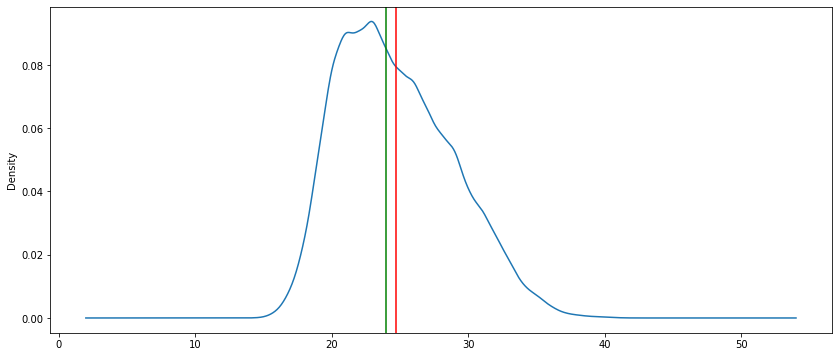

In [ ]:
ax = transfer_df['PlayerAge'].plot(kind='density', figsize=(14,6))
ax.axvline(transfer_df['PlayerAge'].mean(), color='red')
ax.axvline(transfer_df['PlayerAge'].median(), color='green')

Diagram przedstawiający jaki % zawodników gra na danej pozycji

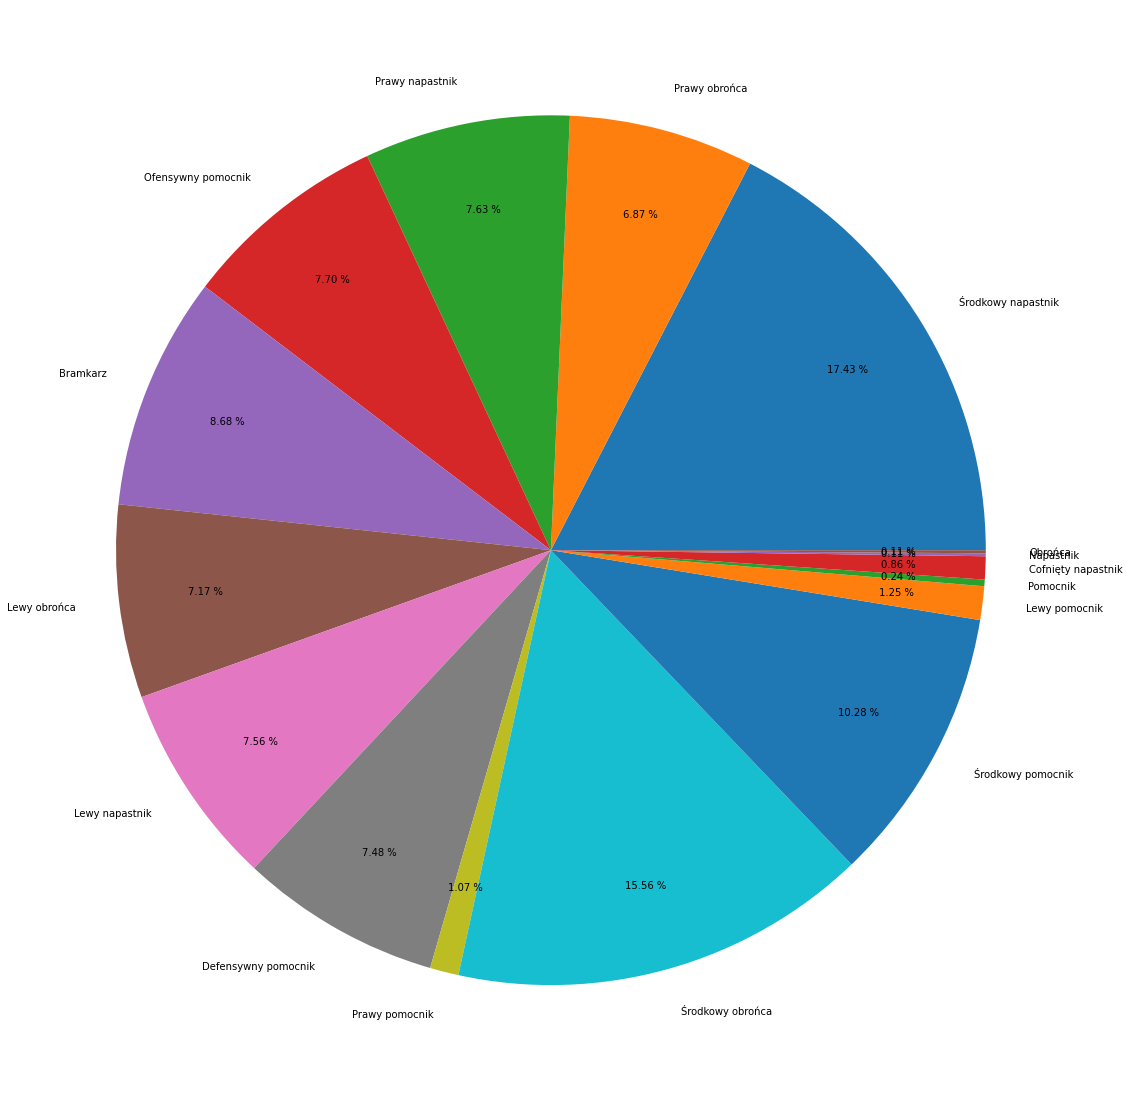

In [ ]:
positions_unique_list = []
for position in transfer_df["PlayerPosition"]:
    if position not in positions_unique_list:
        positions_unique_list.append(position)

amout_of_players = []
for position in positions_unique_list:
    number = transfer_df.loc[transfer_df["PlayerPosition"] == position].count()[0]
    amout_of_players.append(number)

plt.figure(figsize=(20,20))
plt.pie(amout_of_players, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.show()

Diagram wskazuje liczbę piłkarzy w danej kategorii wiekowej

(array([4.4980e+03, 0.0000e+00, 1.0584e+04, 0.0000e+00, 5.8000e+01,
        0.0000e+00, 2.4550e+03, 0.0000e+00, 3.3000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

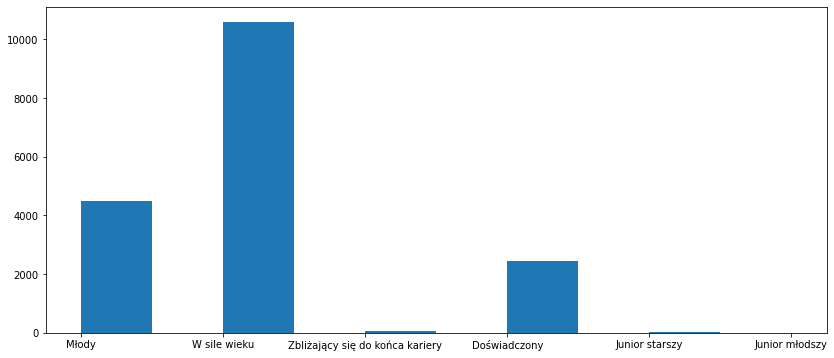

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(transfer_df['PlayerAgeGroup'])

Diagram demonstruje różnice wartości lig piłkarskich wynikacjące z ceny transferwej wszystkich zawodników grających w danej lidze

<BarContainer object of 37 artists>

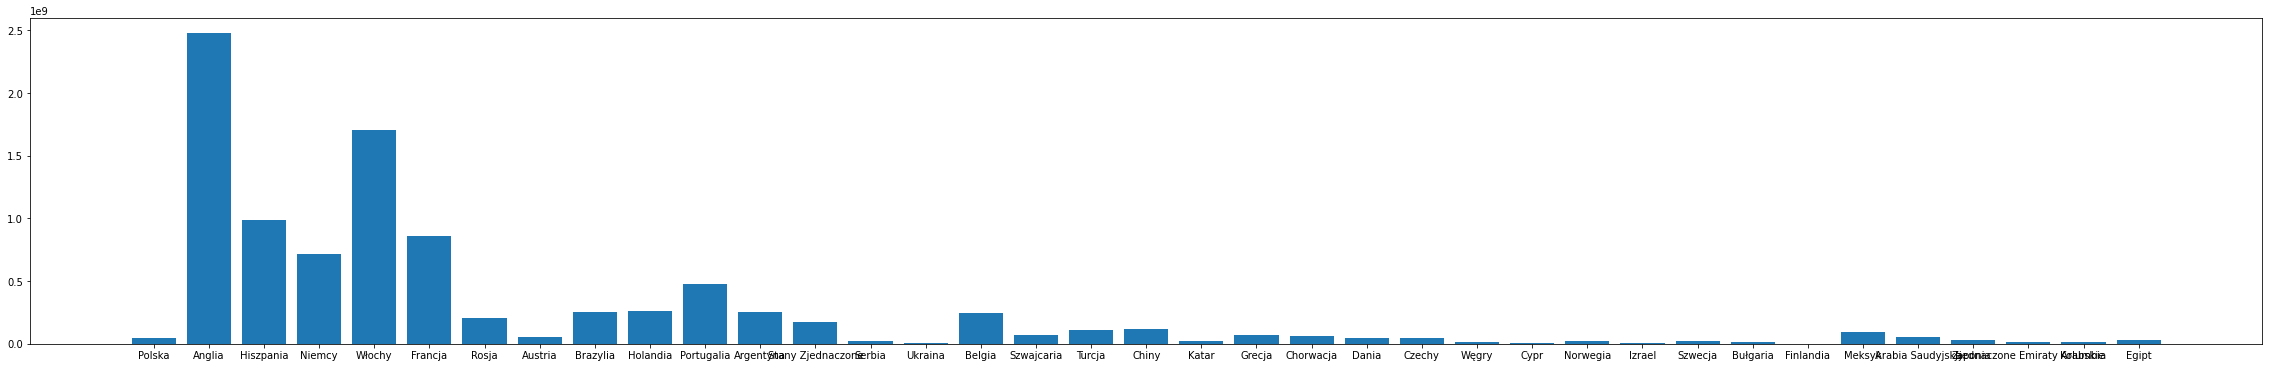

In [ ]:
league_unique_list = []
for league in transfer_df["ClubLeagueNationality"]:
    if league not in league_unique_list:
        league_unique_list.append(league)

amout_of_money = []
for league in league_unique_list:
    transferValues = transfer_df.loc[(transfer_df['ClubLeagueNationality'] == league)]['TransferValue']
    values = 0
    for value in transferValues:
        converted_value = int(value)
        values= values + converted_value
    amout_of_money.append(values)
    
plt.figure(figsize=(40,6))
plt.bar(league_unique_list, amout_of_money)

Procent zawodników na poszczególnych pozycja w poszczególnych ligach 

Text(0, 0.5, 'Percentage(%)')

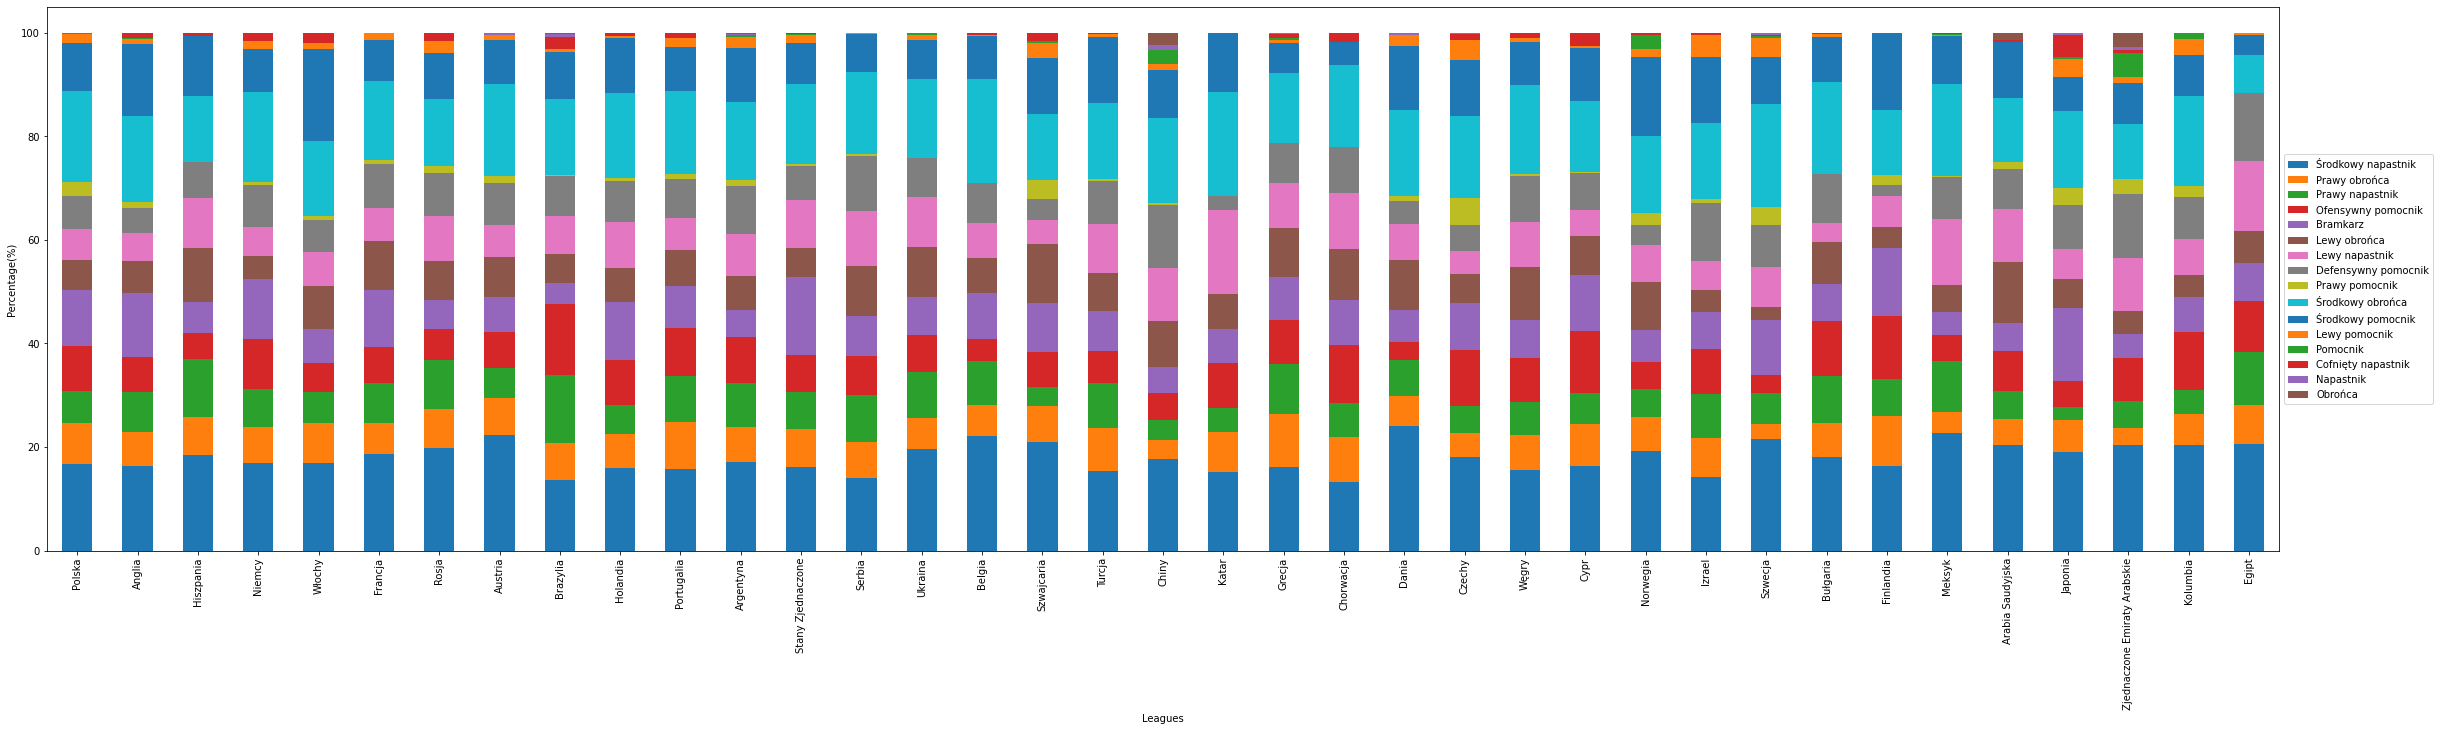

In [ ]:
listNumberOfPlayers = []
for league in league_unique_list:
    amout_of_players = []
    for position in positions_unique_list:
        number = transfer_df.loc[(transfer_df["PlayerPosition"] == position) & (transfer_df["ClubLeagueNationality"] == league)].count()[0]
        amout_of_players.append(number)
    listNumberOfPlayers.append(amout_of_players)  
df = pd.DataFrame(columns=positions_unique_list, data=listNumberOfPlayers, index=league_unique_list)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Leagues")
plt.ylabel("Percentage(%)")



Macierz korelacji statystyk zawodników

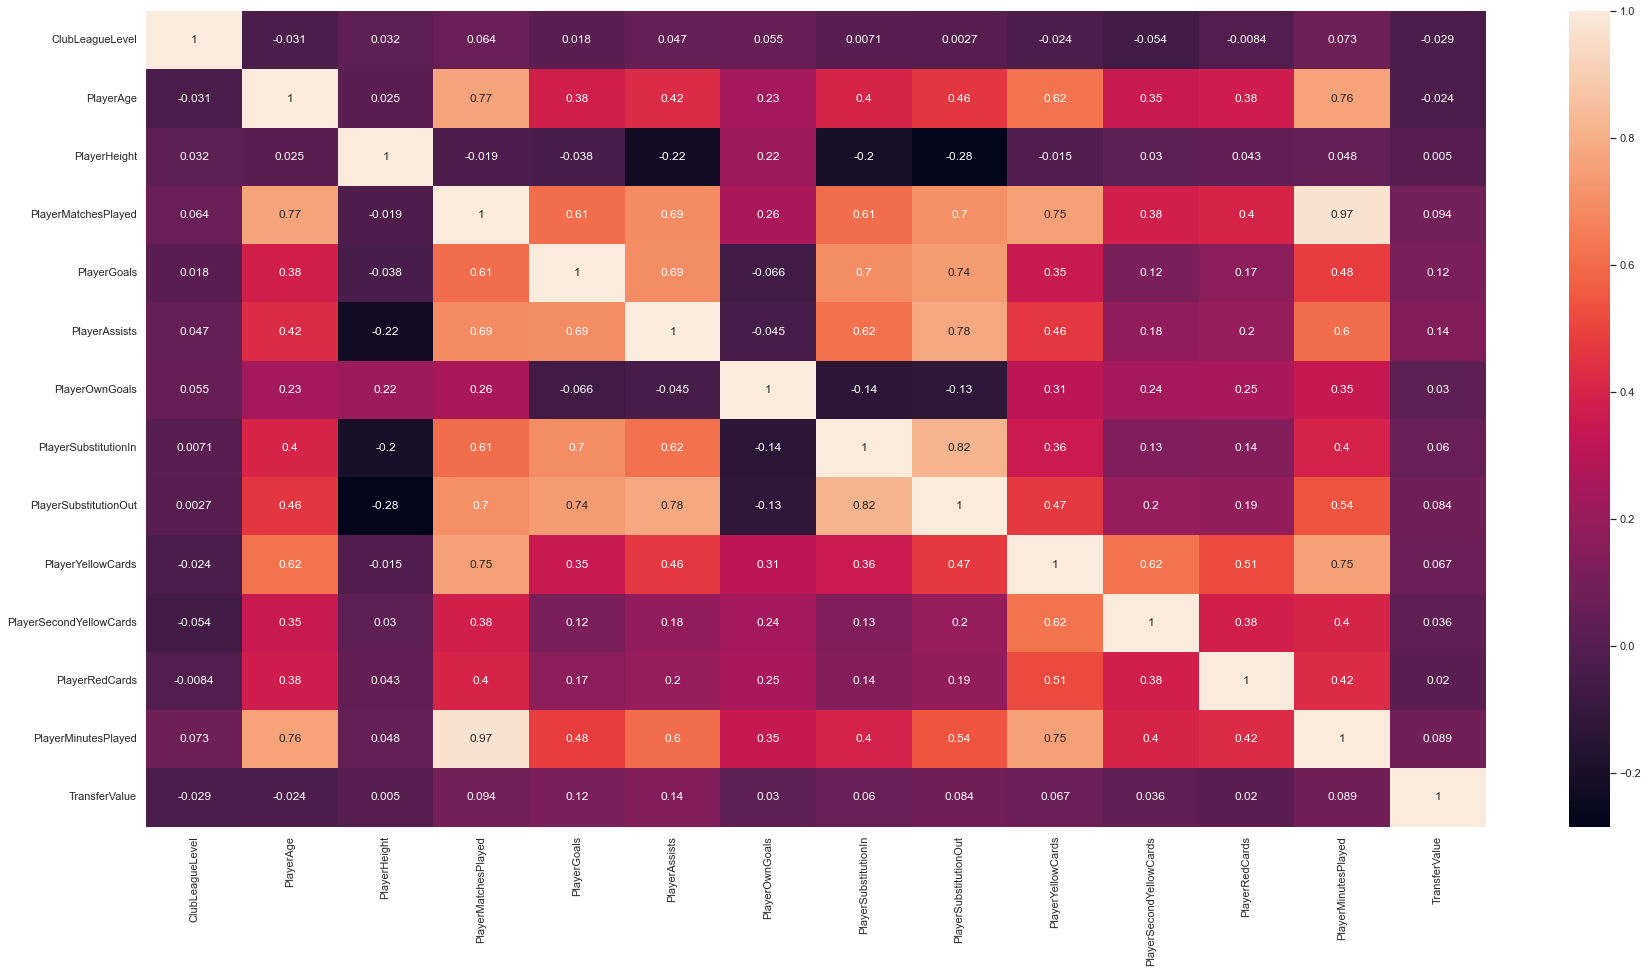

<Figure size 2880x2880 with 0 Axes>

In [ ]:
df = transfer_df.drop(labels=['PlayerMarketValue', 'PlayerWithoutClub', 'PlayerWithoutClub', 'ClubAssignedLeagueLevel'],axis=1)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(40,40))
plt.show()

C:\Python\Python392\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

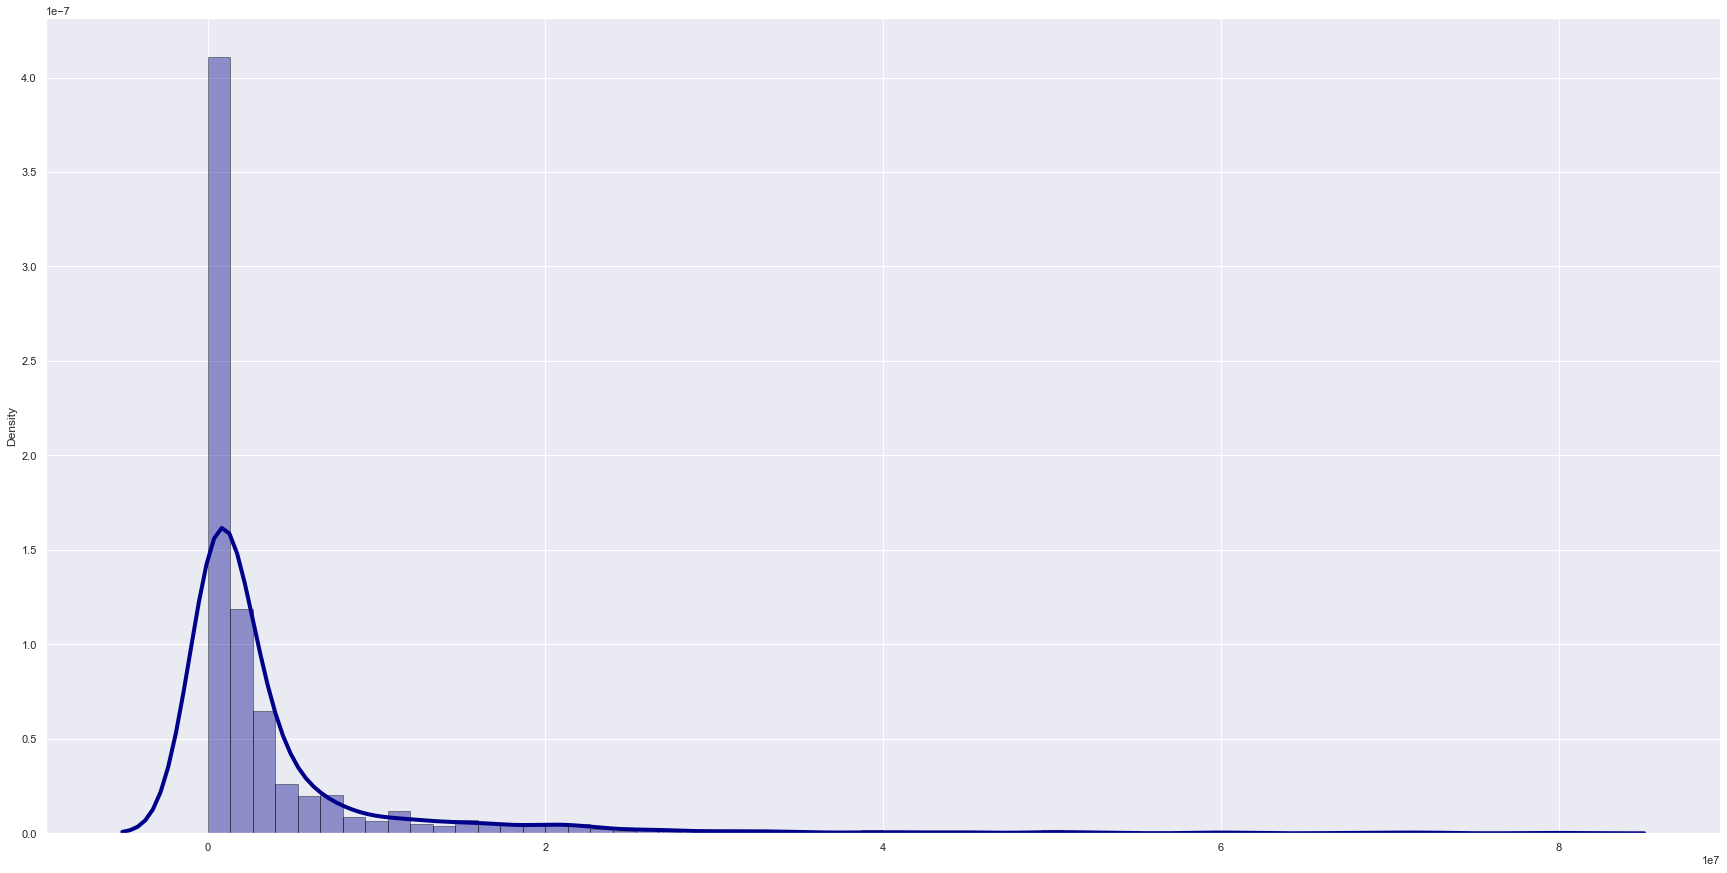

In [ ]:
transfer_df['TransferValue'] = transfer_df['TransferValue'].astype("int64")
transferValues = []
for value in transfer_df["TransferValue"]:
    if value != 0:
        transferValues.append(value)
sns.set(rc={'figure.figsize':(30,15)})
sns.distplot(transferValues, kde=True, 
             bins=int(180/3), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


Wykres zawierający informację o % wszystkich goli strzelonych przez zawodników na danej pozycji

[169585, 9359, 40044, 38924, 135, 9022, 40536, 12386, 3747, 22333, 32227, 4587, 183, 6934, 323, 19]


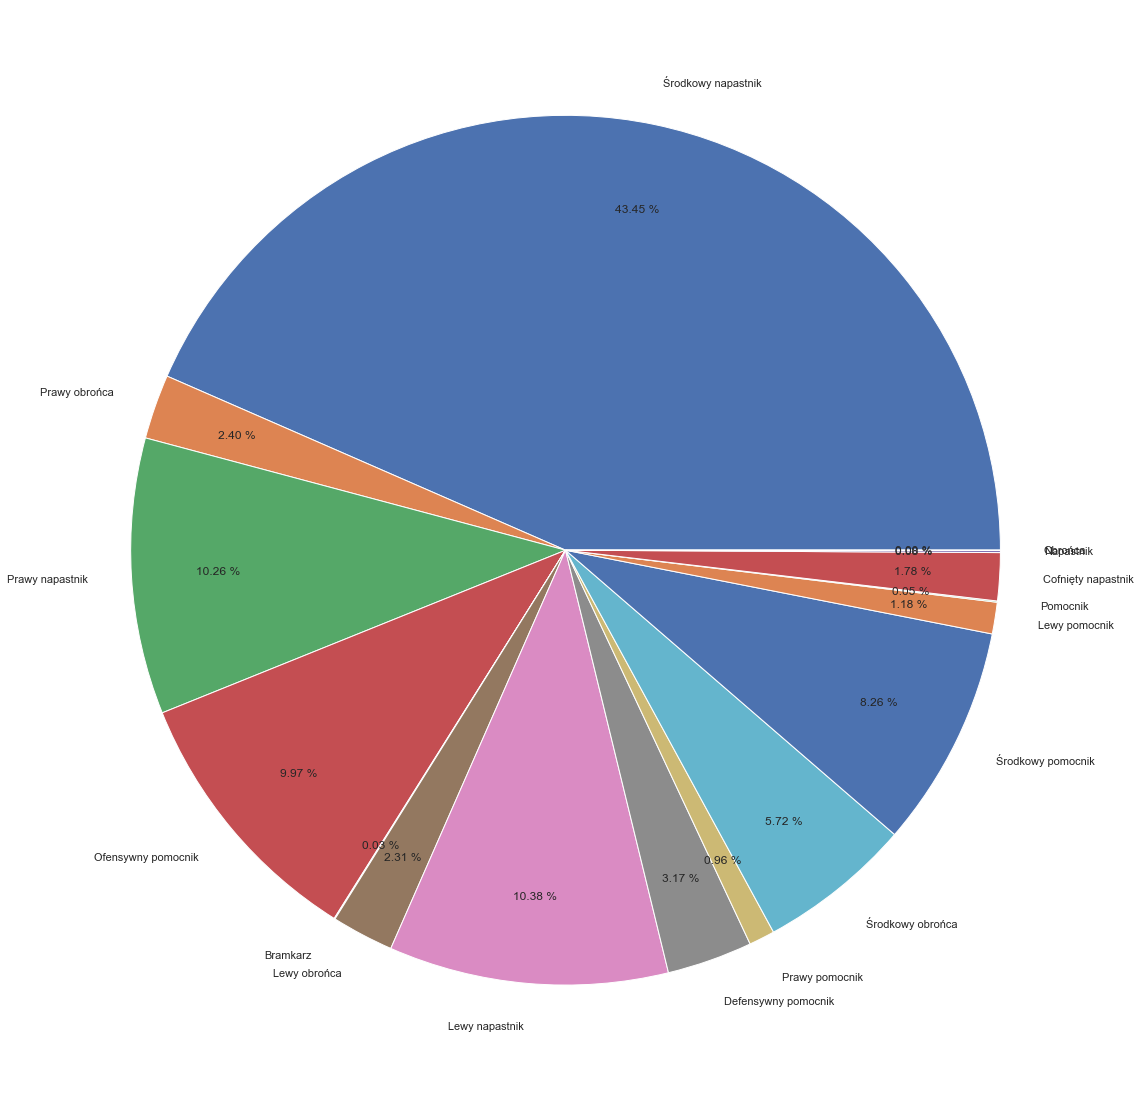

In [ ]:
amout_of_goals = []
for position in positions_unique_list:
    goals = transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerGoals']
    goals_sum = 0
    for value in goals:
        converted_value = int(value)
        goals_sum= goals_sum + converted_value
    amout_of_goals.append(goals_sum)
print(amout_of_goals)
plt.figure(figsize=(20,20))

plt.pie(amout_of_goals, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.show()

Procent strzelonych goli w zależności od pozycji zawodników w poszczególnych ligach 

Text(0, 0.5, 'Percentage(%)')

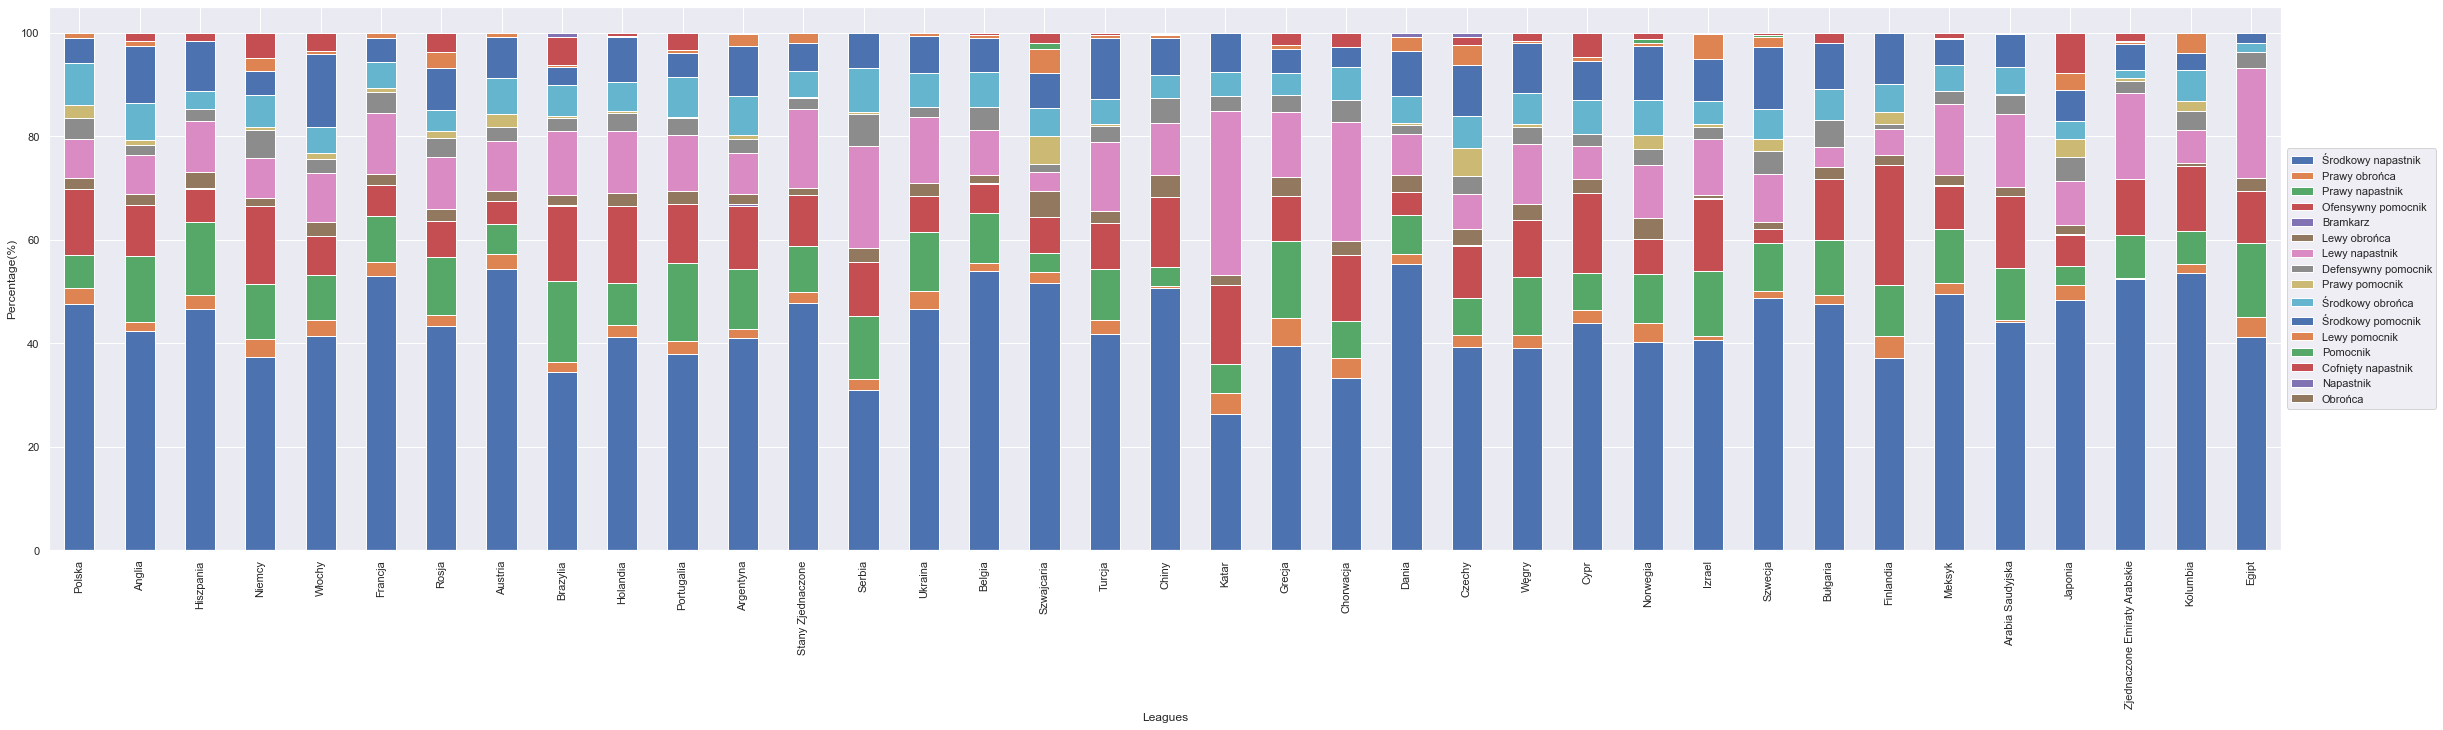

In [ ]:
listNumberOfGoals = []
for league in league_unique_list:
    amout_of_goals = []
    for position in positions_unique_list:
        goals_sum = 0
        goals = transfer_df.loc[(transfer_df["PlayerPosition"] == position) & (transfer_df["ClubLeagueNationality"] == league)]['PlayerGoals']
        for value in goals:
            converted_value = int(value)
            goals_sum= goals_sum + converted_value
        amout_of_goals.append(goals_sum)
    listNumberOfGoals.append(amout_of_goals)
df = pd.DataFrame(columns=positions_unique_list, data=listNumberOfGoals, index=league_unique_list)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Leagues")
plt.ylabel("Percentage(%)")

Wykres wskazuje śrędnią bramek na mecz w zależności od pozycji na boisku

[1532, 142, 529, 372, 0, 93, 791, 115, 0, 65, 73, 0, 0, 0, 0, 0]
[44, 16, 22, 21, 16, 13, 29, 28, 0, 16, 8, 1, 0, 0, 0, 0]
[0.002607340036625299, 0.000677248273493838, 0.002209533992991308, 0.0015715830742192782, 0.0, 0.0004469284481971483, 0.003455491435536082, 0.00048698480183953204, nan, 0.0001421016617149703, 0.0002179449286006443, 0.0, nan, nan, nan, nan]


C:\Users\Admin\AppData\Local\Temp/ipykernel_15712/3782269297.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  gpratio = [i / j for i, j in zip(amout_of_goals, amout_of_players)]
C:\Users\Admin\AppData\Local\Temp/ipykernel_15712/3782269297.py:12: RuntimeWarning: divide by zero encountered in longlong_scalars
  apratio = [i / j for i, j in zip(amout_of_appearances, amout_of_players)]


<BarContainer object of 16 artists>

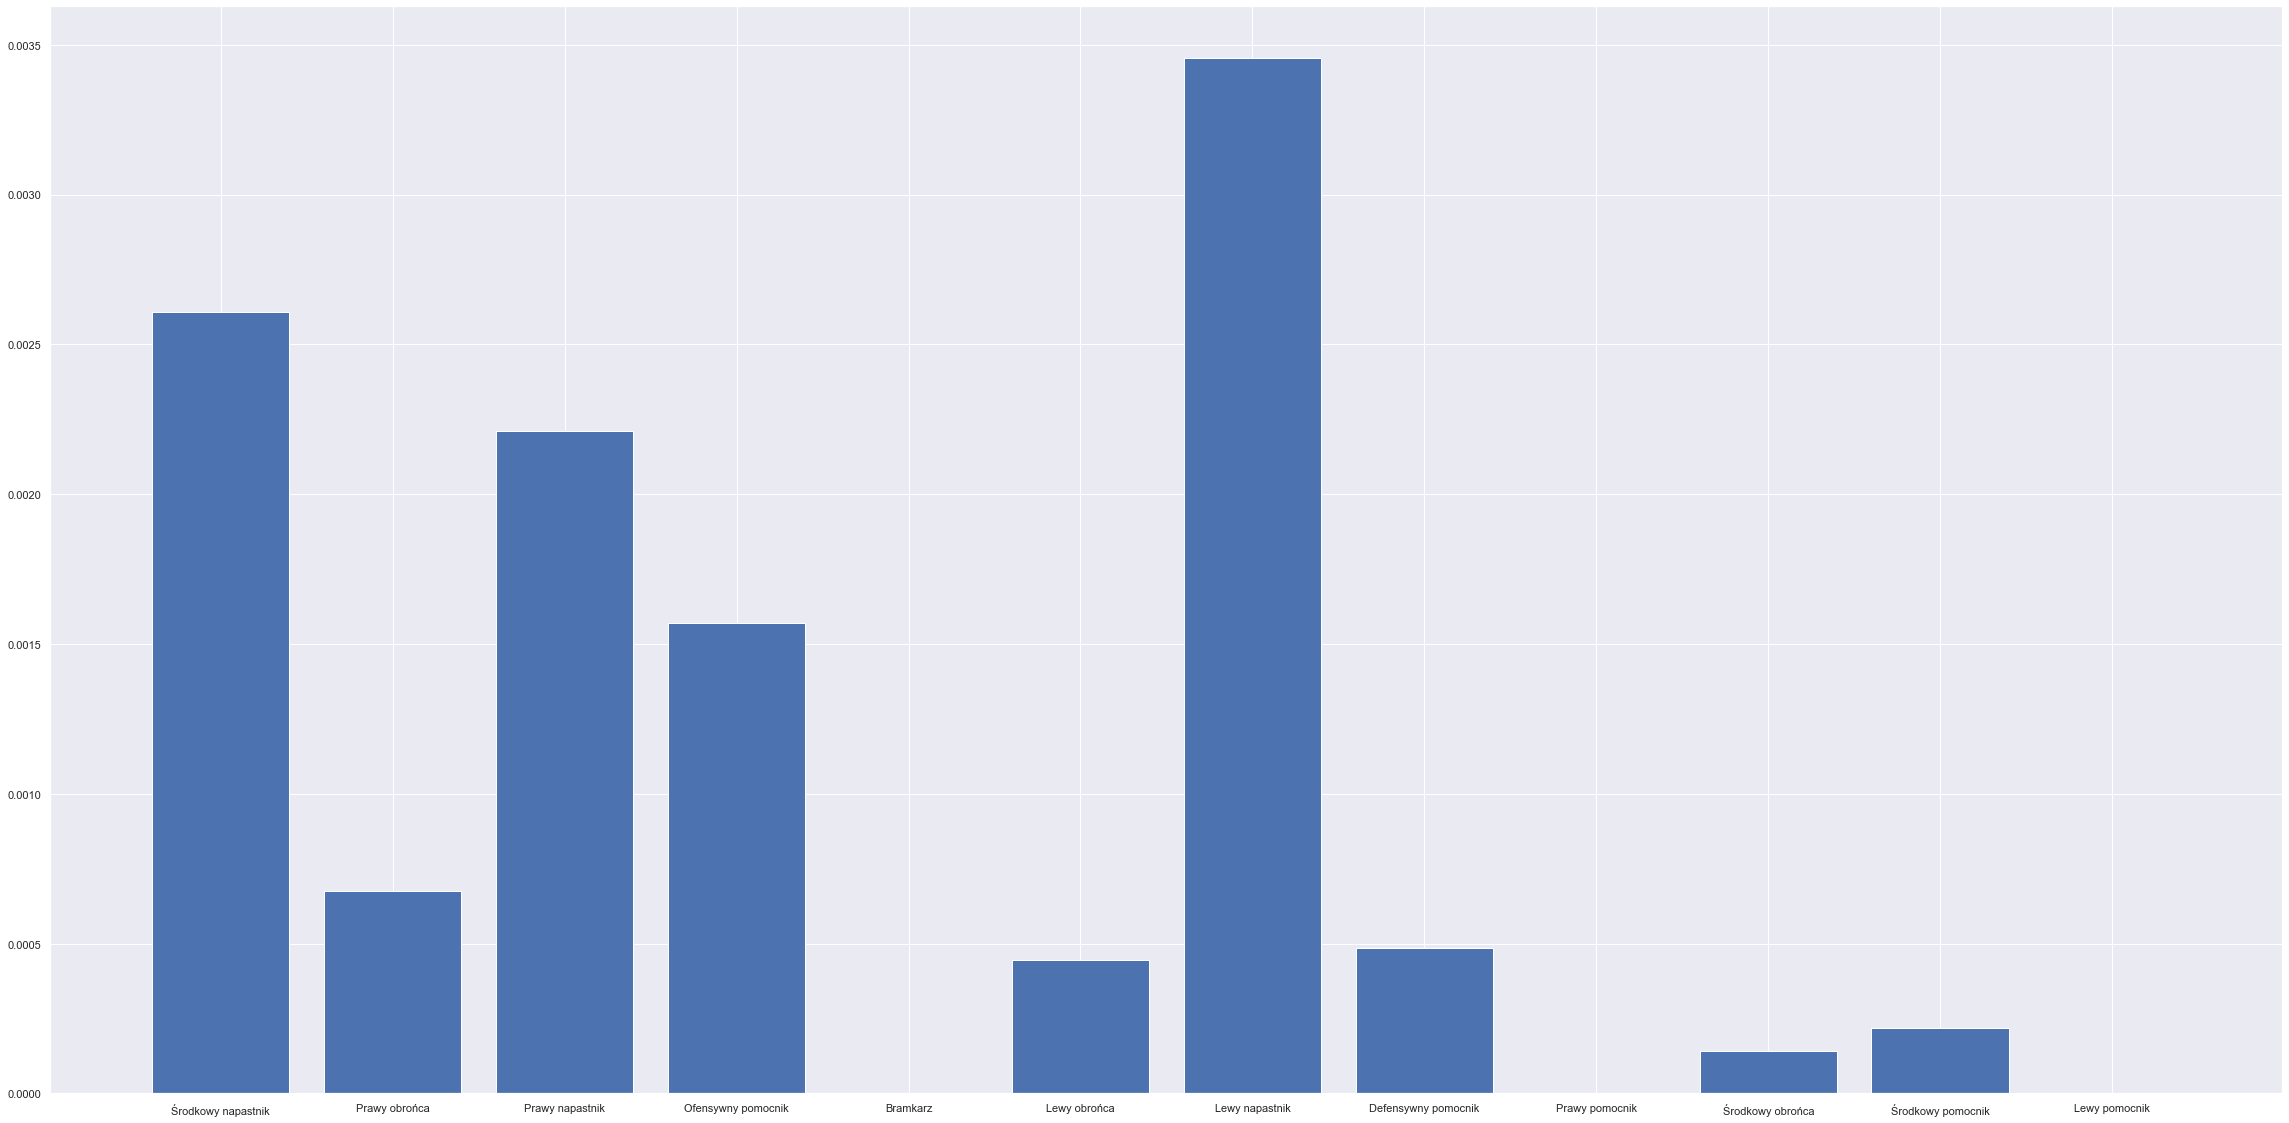

In [ ]:
print(amout_of_goals)
print(amout_of_players)
gpratio = [i / j for i, j in zip(amout_of_goals, amout_of_players)]
amout_of_appearances = []
for position in positions_unique_list:
    appearances = transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerMatchesPlayed']
    appearances_amount = 0
    for value in appearances:
        converted_value = int(value)
        appearances_amount= appearances_amount + converted_value
    amout_of_appearances.append(appearances_amount)
apratio = [i / j for i, j in zip(amout_of_appearances, amout_of_players)]
ggratio = [i / j for i, j in zip(gpratio, apratio)]
print(ggratio)
plt.figure(figsize=(40,20))
plt.bar(positions_unique_list, ggratio)

Średnia ilość minut spędzona na boisku dla kategorii wiekowej Junior, oraz Młody w zależności od kraju ligi:

['Szwajcaria', 'Egipt', 'Japonia', 'Grecja', 'Anglia', 'Serbia', 'Ukraina', 'Katar', 'Stany Zjednaczone', 'Portugalia', 'Francja', 'Holandia', 'Niemcy', 'Finlandia', 'Rosja', 'Brazylia', 'Norwegia', 'Kolumbia', 'Turcja', 'Włochy', 'Meksyk', 'Zjednaczone Emiraty Arabskie', 'Cypr', 'Węgry', 'Belgia', 'Arabia Saudyjska', 'Polska', 'Austria', 'Bułgaria', 'Chorwacja', 'Czechy', 'Argentyna', 'Dania', 'Izrael', 'Chiny', 'Hiszpania', 'Szwecja']


<BarContainer object of 37 artists>

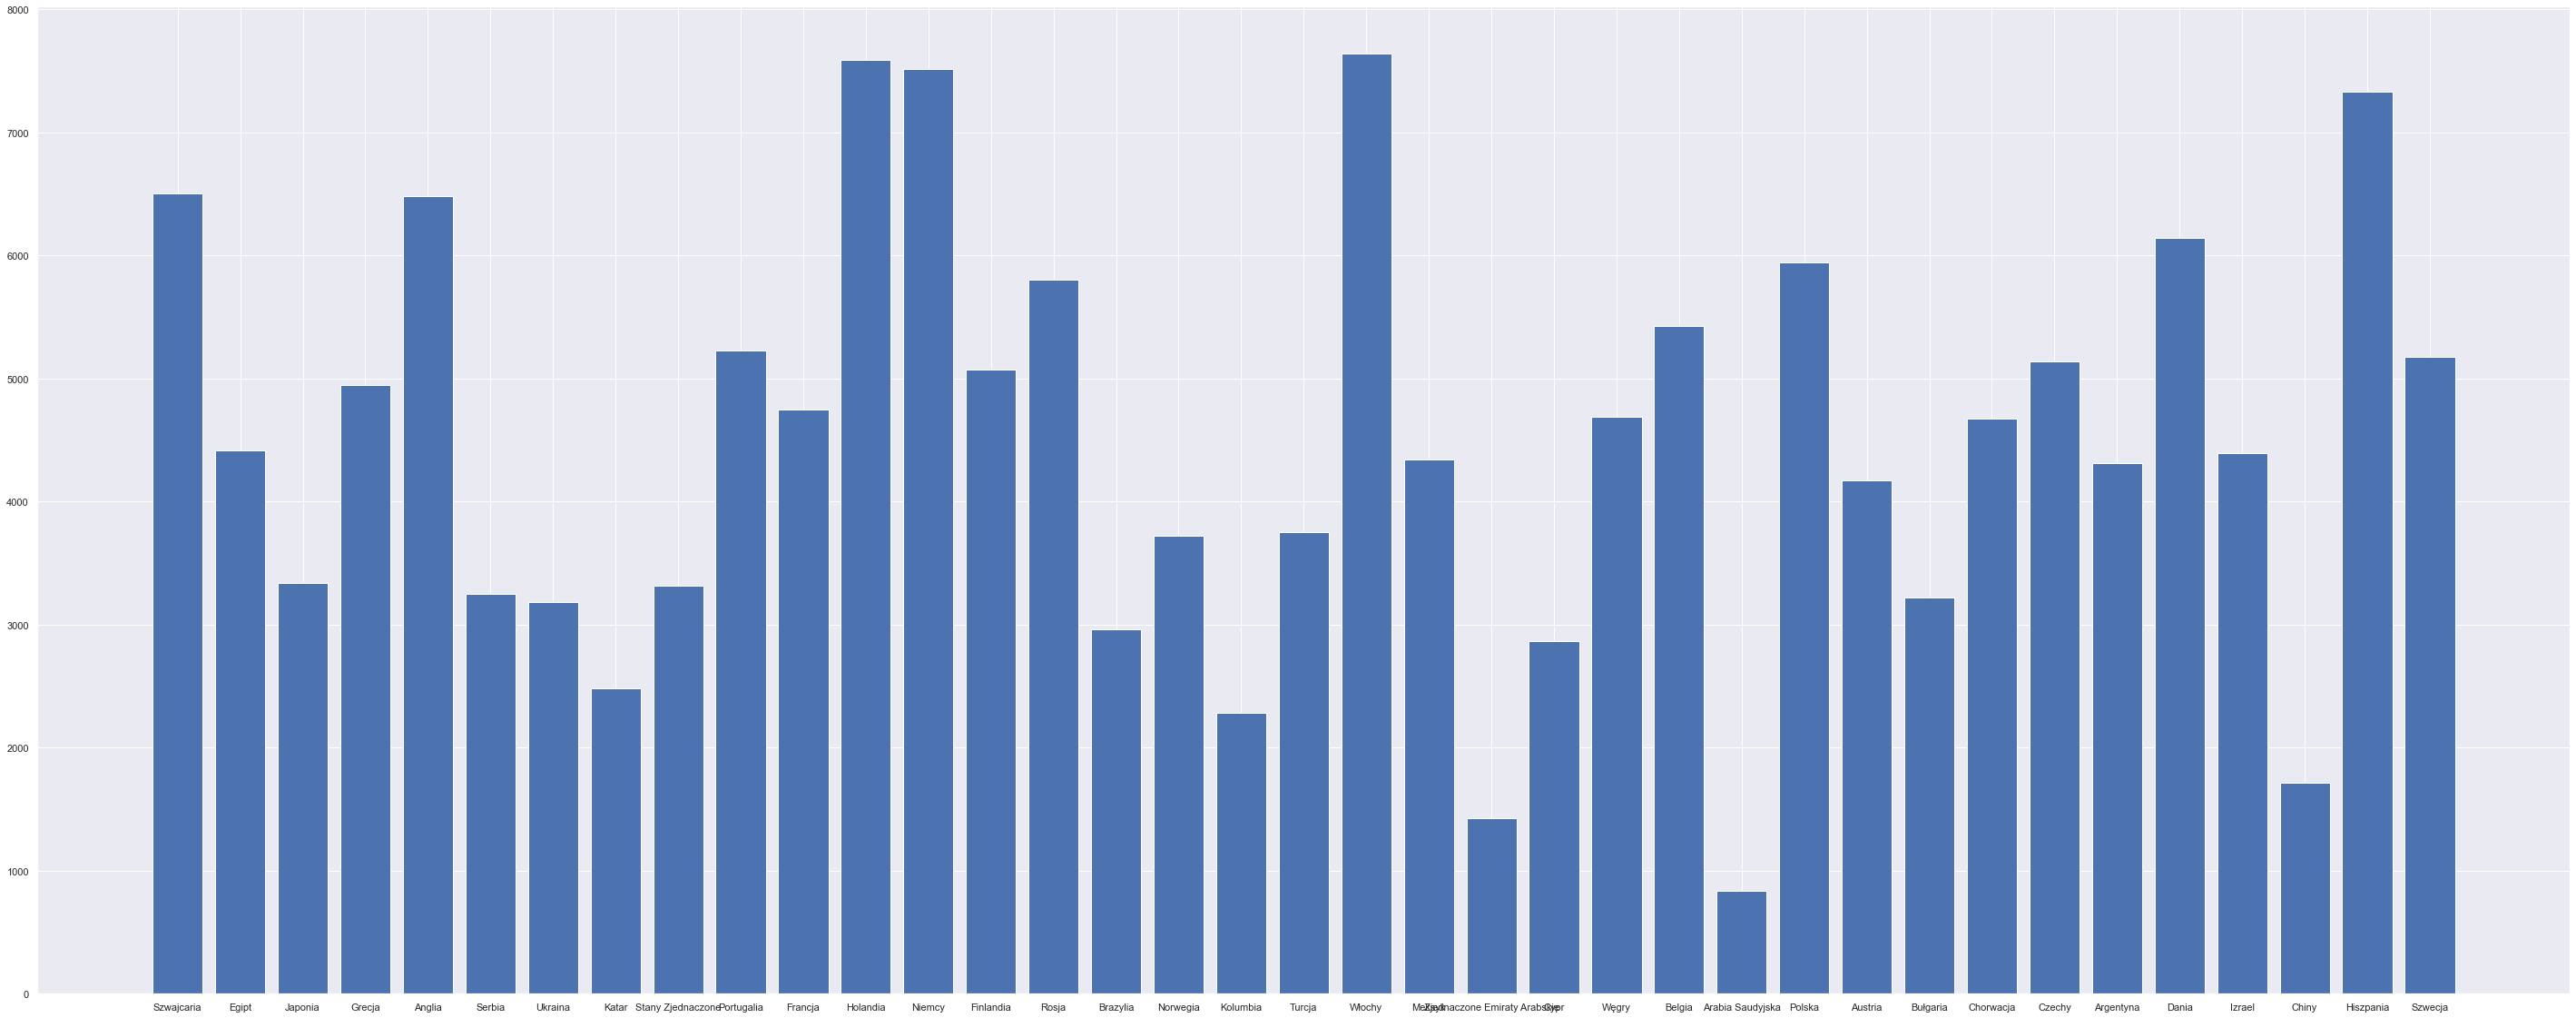

In [102]:
young_players = transfer_df.loc[
    (transfer_df['PlayerAgeGroup'] == 'Junior młodszy') | (transfer_df['PlayerAgeGroup'] == 'Junior starszy') | (transfer_df['PlayerAgeGroup'] == 'Młody')]
minutes_played = []
for league in league_unique_list:
    minutes_played.append(statistics.mean(young_players.loc[(young_players['ClubLeagueNationality'] == league)]['PlayerMinutesPlayed']))
plt.figure(figsize=(50,20))
plt.bar(league_unique_list, minutes_played)

TOP 20 najbardziej wartościowych klubów licząc tylko wartość zawodników:

<BarContainer object of 20 artists>

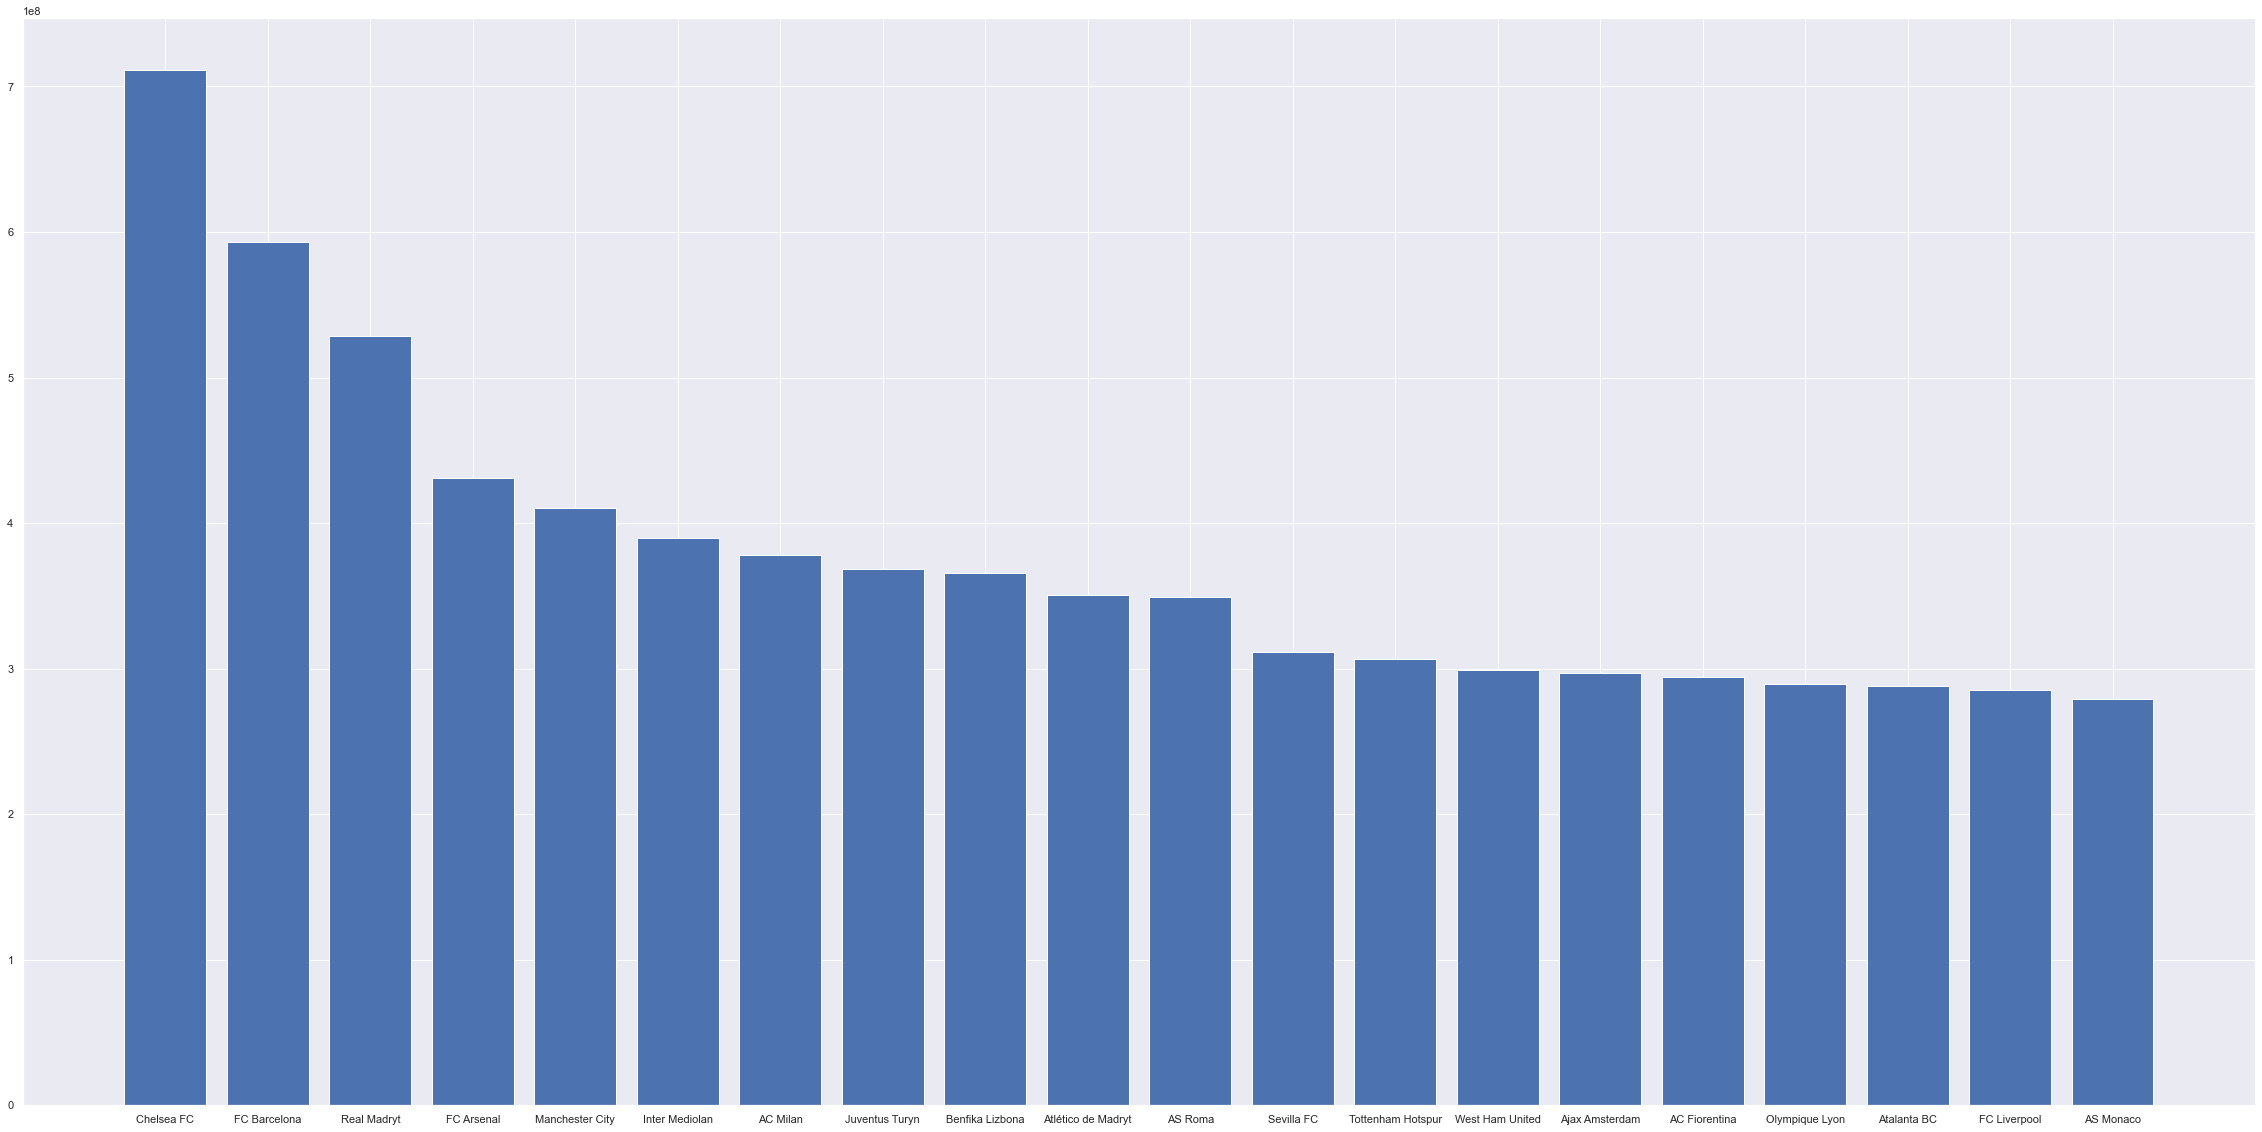

In [ ]:
def sort_values(val):
    return val[0]

club_values = []
club_unique_list = list(set(transfer_df["Club"]))
for club in club_unique_list:
    club_values.append([statistics.fsum(transfer_df.loc[(transfer_df['Club'] == club)]['PlayerMarketValue']),club])
club_values.sort(key=sort_values,reverse=True)
plt.figure(figsize=(40,20))
top_club_names = [row[1] for row in club_values[:20]]
top_club_values = [row[0] for row in club_values[:20]]
plt.bar(top_club_names,top_club_values)

Średnia liczba kartek na mecz w zależności od narodowości zawodnika (czerwone kartki liczą się x3) dla co najmniej 100 występów zawodnika i 100 graczy:

<BarContainer object of 37 artists>

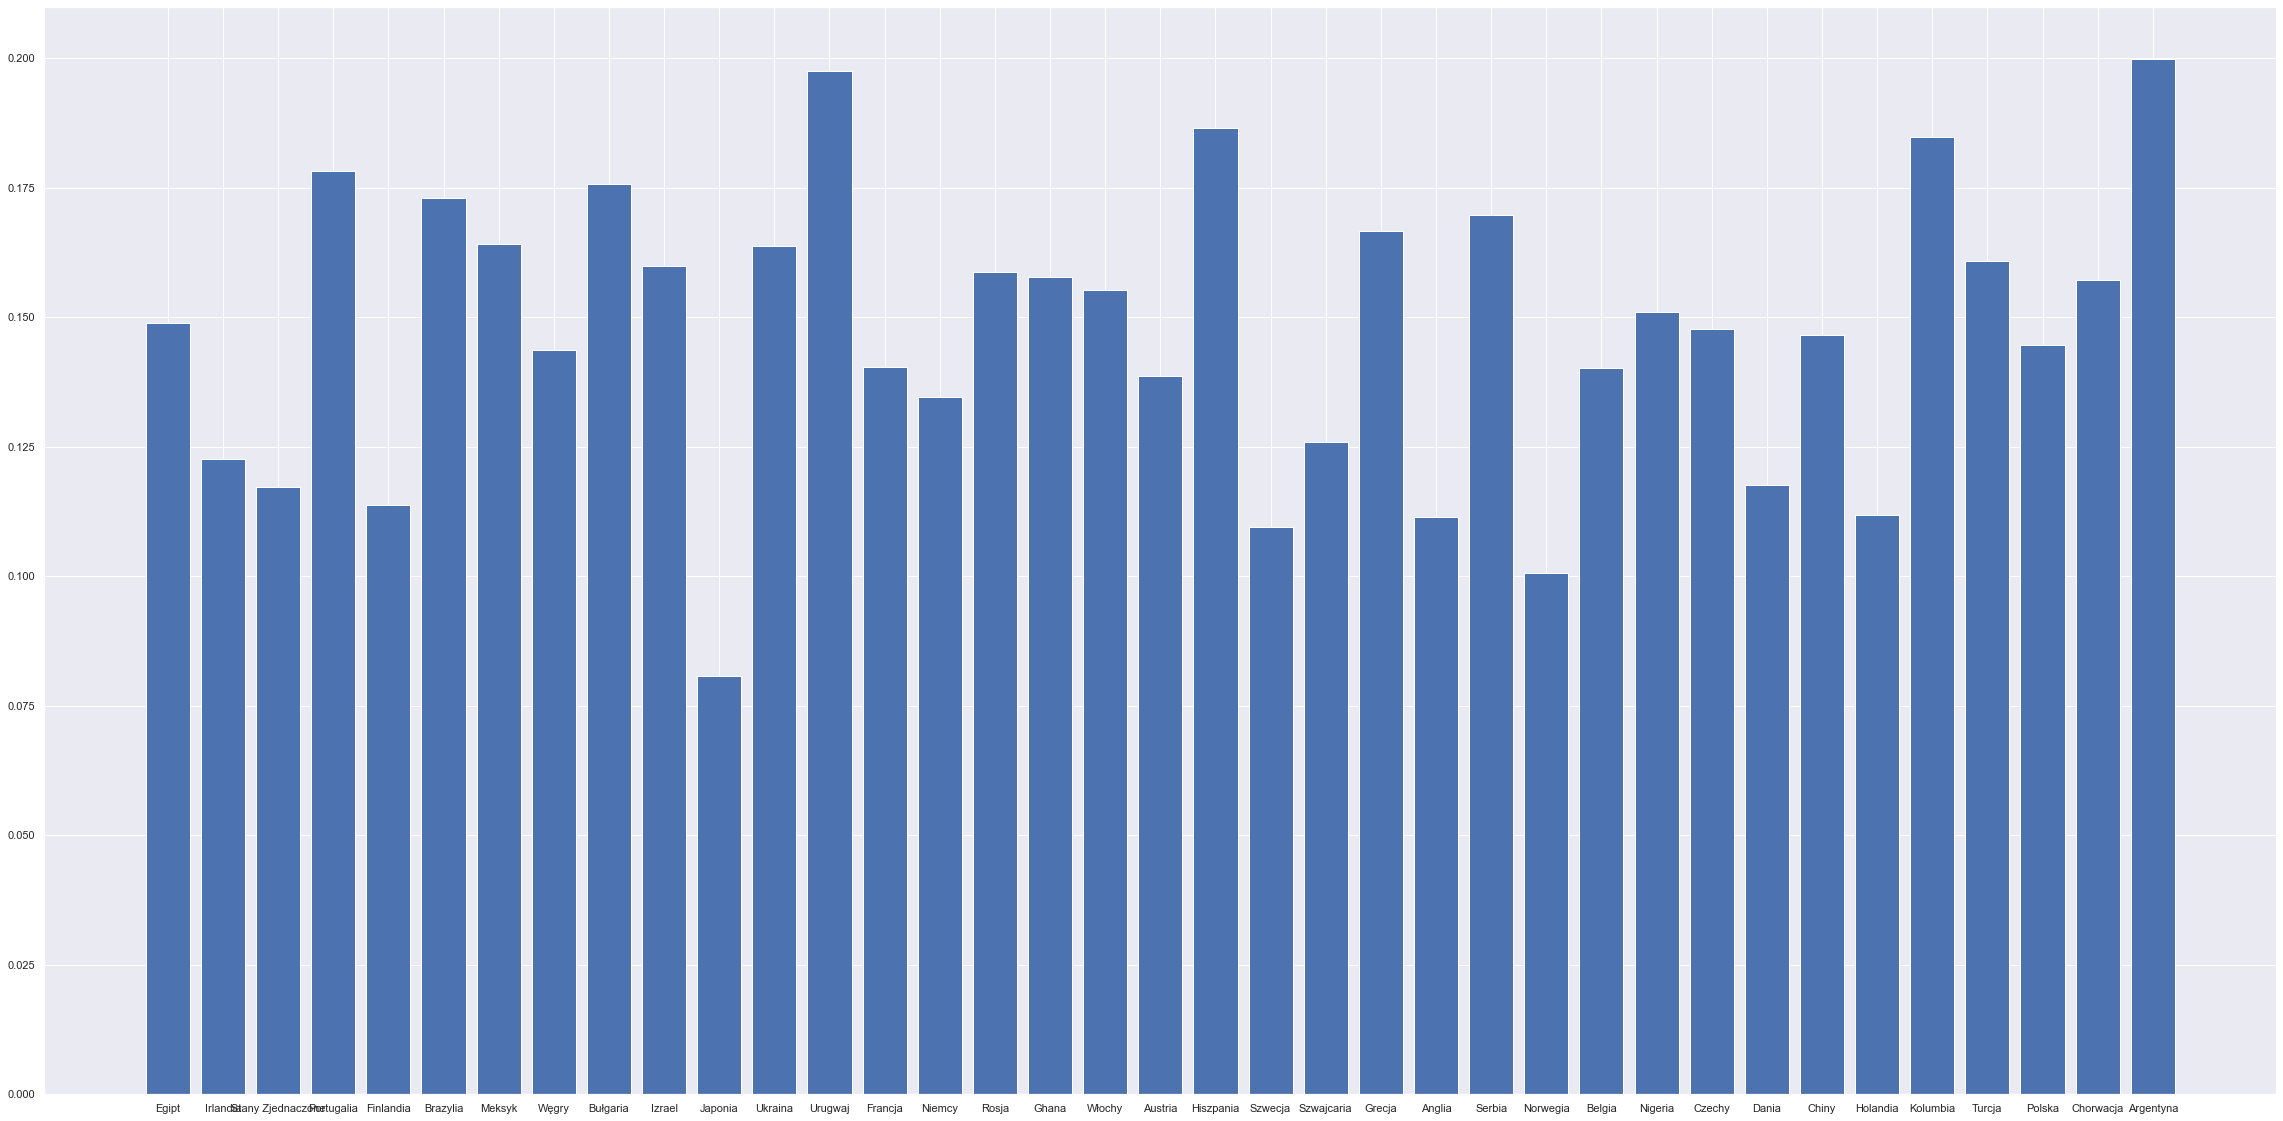

In [ ]:

nationality_unique_list = list(set(transfer_df["PlayerNationality"]))
nationality_cards_per_match = []
display_nationalities = []
for nationality in nationality_unique_list:
    natianal_players = transfer_df[transfer_df["PlayerNationality"] == nationality]
    cards_ratio = [i / j if j > 100 else -1 for i, j in zip(natianal_players["PlayerYellowCards"] + natianal_players["PlayerSecondYellowCards"] + 3*natianal_players["PlayerRedCards"], natianal_players["PlayerMatchesPlayed"])]
    cards_ratio = [card_ratio for card_ratio in cards_ratio if card_ratio >= 0]
    if(len(cards_ratio) >= 100):
        display_nationalities.append(nationality)
        nationality_cards_per_match.append(statistics.mean(cards_ratio))
plt.figure(figsize=(40,20))
plt.bar(display_nationalities,nationality_cards_per_match)

Najczęściej wpuszczani (zmieniani - wchodzący na boisko)  gracze w trakcie meczu w zależności od pozycji w %

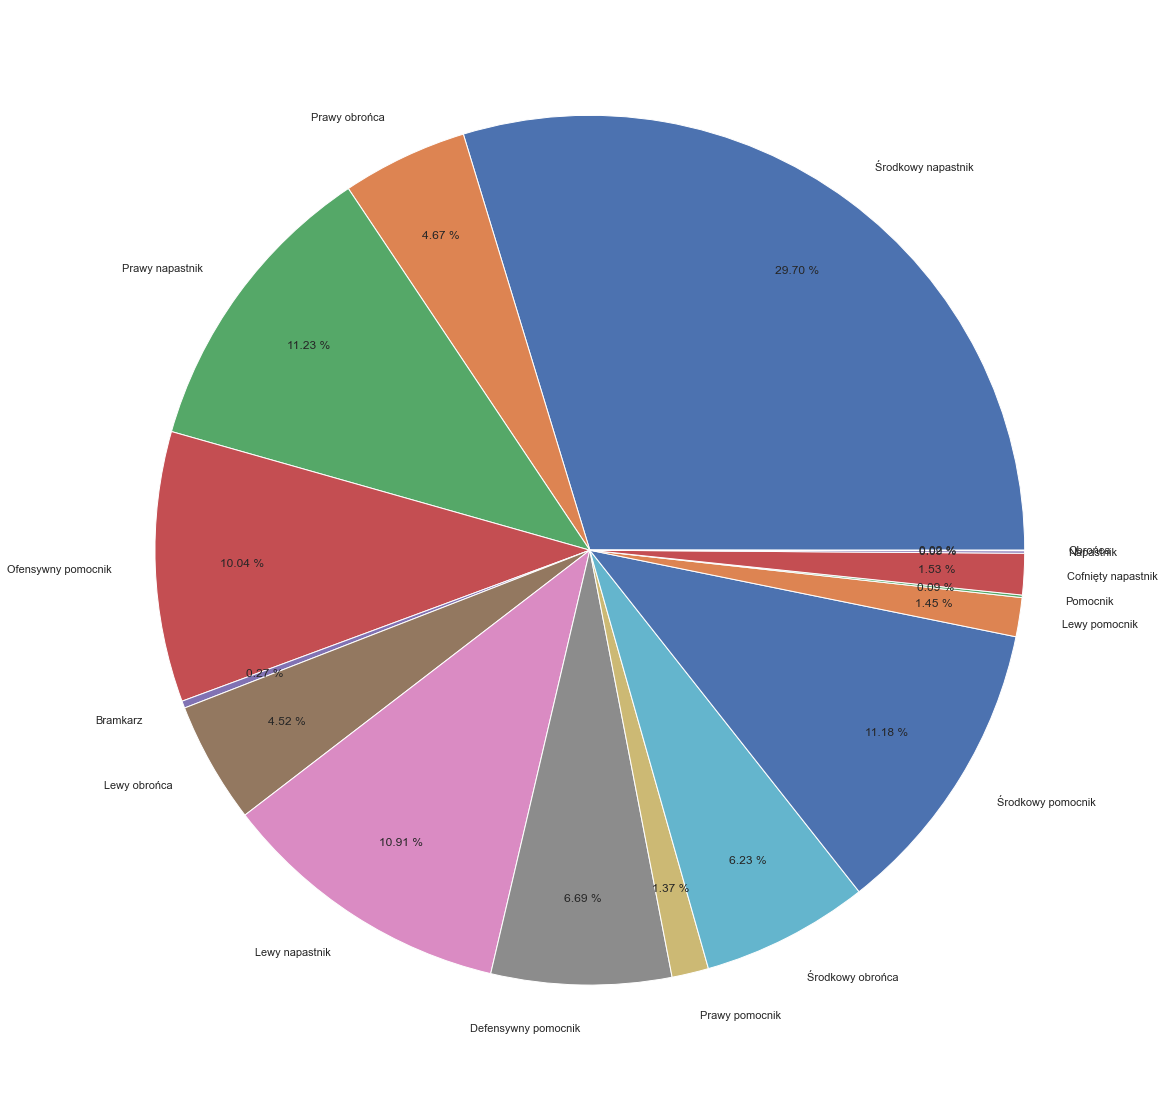

In [ ]:
substition_list = []
for position in positions_unique_list:
    substition_list.append(statistics.fsum(transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerSubstitutionIn']))
plt.figure(figsize=(20,20))

plt.pie(substition_list, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.show()

Text(0, 0.5, 'Percentage(%)')

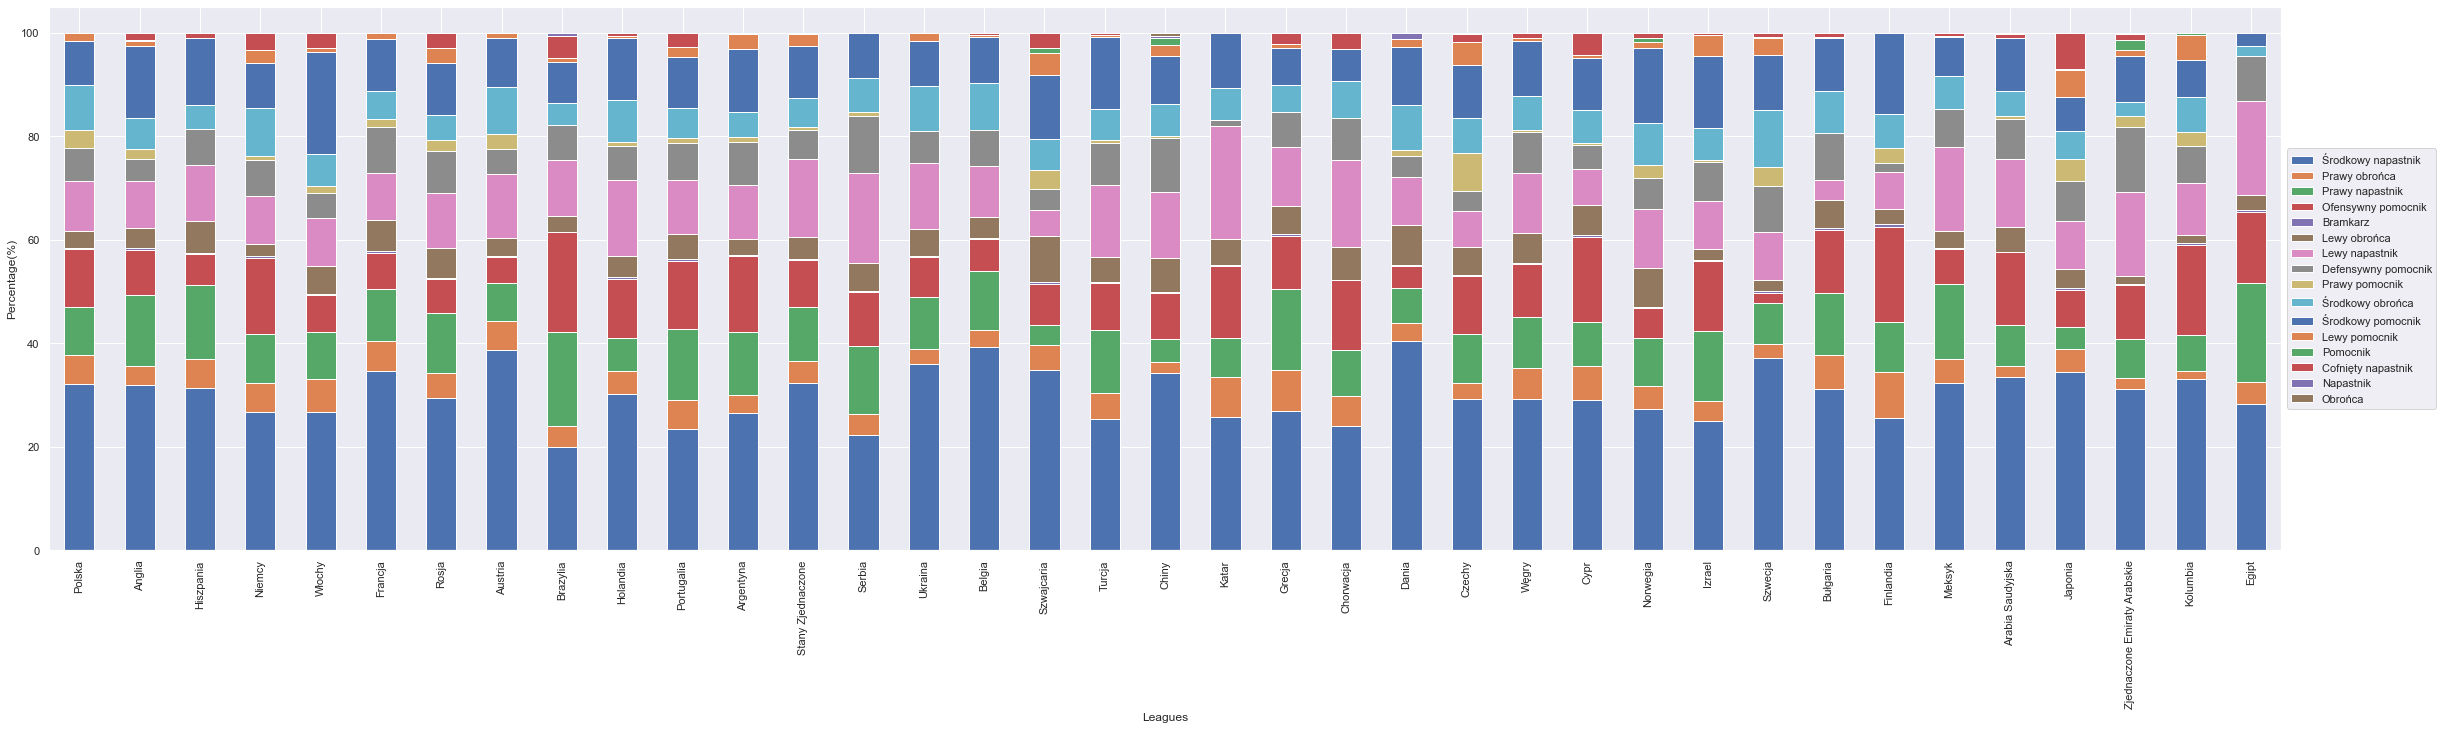

In [ ]:
ListOfsubstition_list = []
for league in league_unique_list:
    substition_list = []
    for position in positions_unique_list:
        substition_list.append(statistics.fsum(transfer_df.loc[(transfer_df['PlayerPosition'] == position) & (transfer_df['ClubLeagueNationality'] == league)]['PlayerSubstitutionIn']))
    ListOfsubstition_list.append(substition_list)
df = pd.DataFrame(columns=positions_unique_list, data=ListOfsubstition_list, index=league_unique_list)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Leagues")
plt.ylabel("Percentage(%)")

Częstotliwość zmieniania zawodnika (wejścia z ławki oraz zejścia z boiska) w trakcie meczu w % w zależności od wieku:

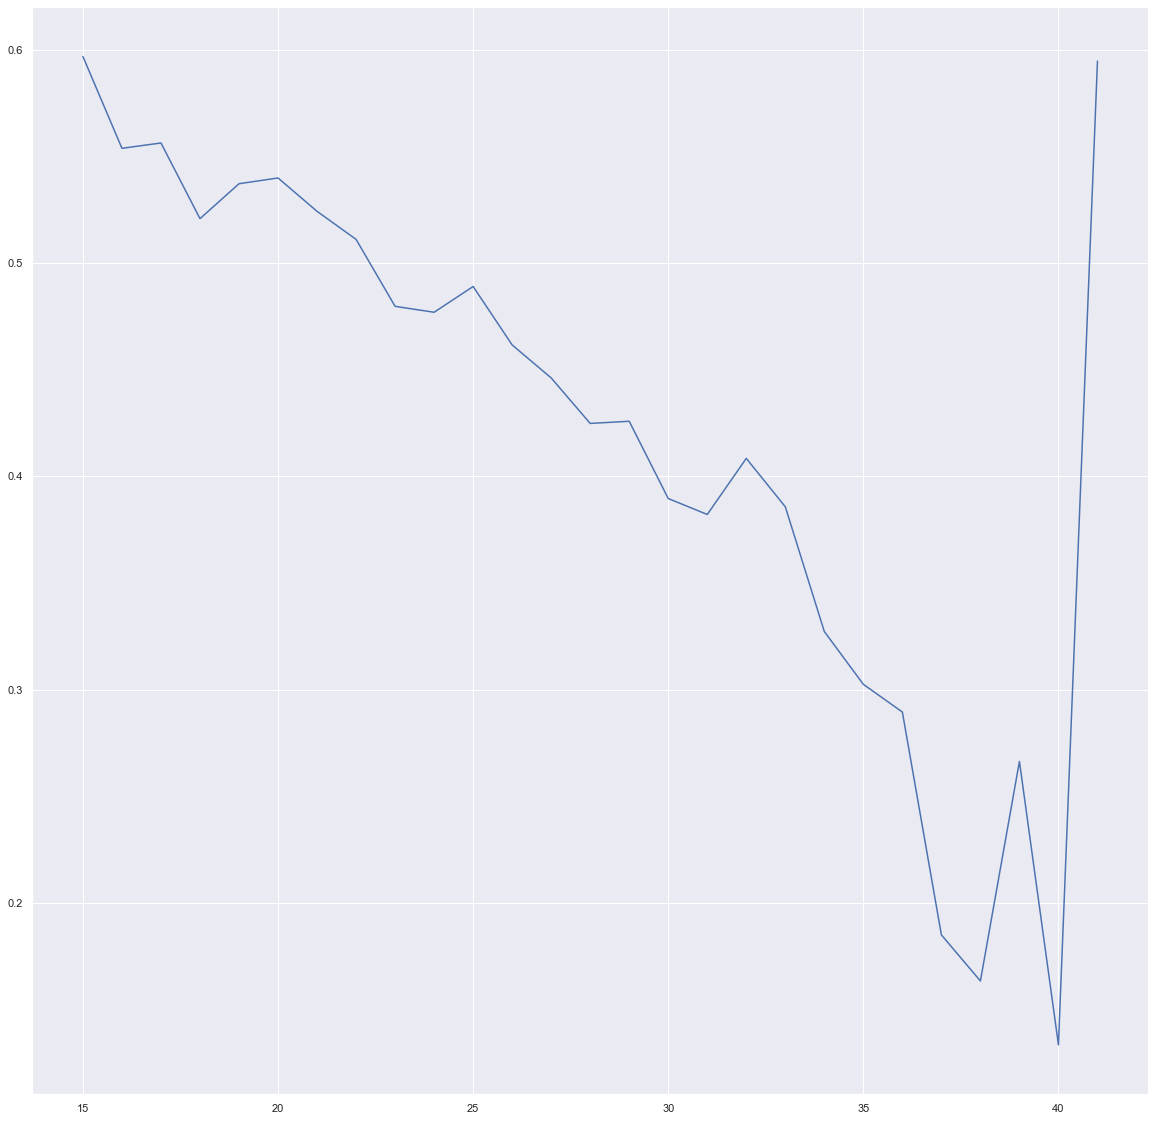

In [ ]:
age_unique_list = list(set(transfer_df["PlayerAge"]))
substitutions = []
for age in age_unique_list:
    age_players = transfer_df[transfer_df["PlayerAge"] == age]
    substitution_ratio = [i / j if j != 0 else -1 for i, j in zip(age_players["PlayerSubstitutionIn"] + age_players["PlayerSubstitutionOut"], age_players["PlayerMatchesPlayed"])]
    substitution_ratio = [substitution for substitution in substitution_ratio if substitution >= 0]
    substitutions.append(statistics.mean(substitution_ratio))
plt.figure(figsize=(20,20))
plt.plot(age_unique_list,substitutions)

Histogram liczby transferów (zakontraktowanych zawodników?) z ostatnich trzech lat:

<AxesSubplot:xlabel='TransferDate'>

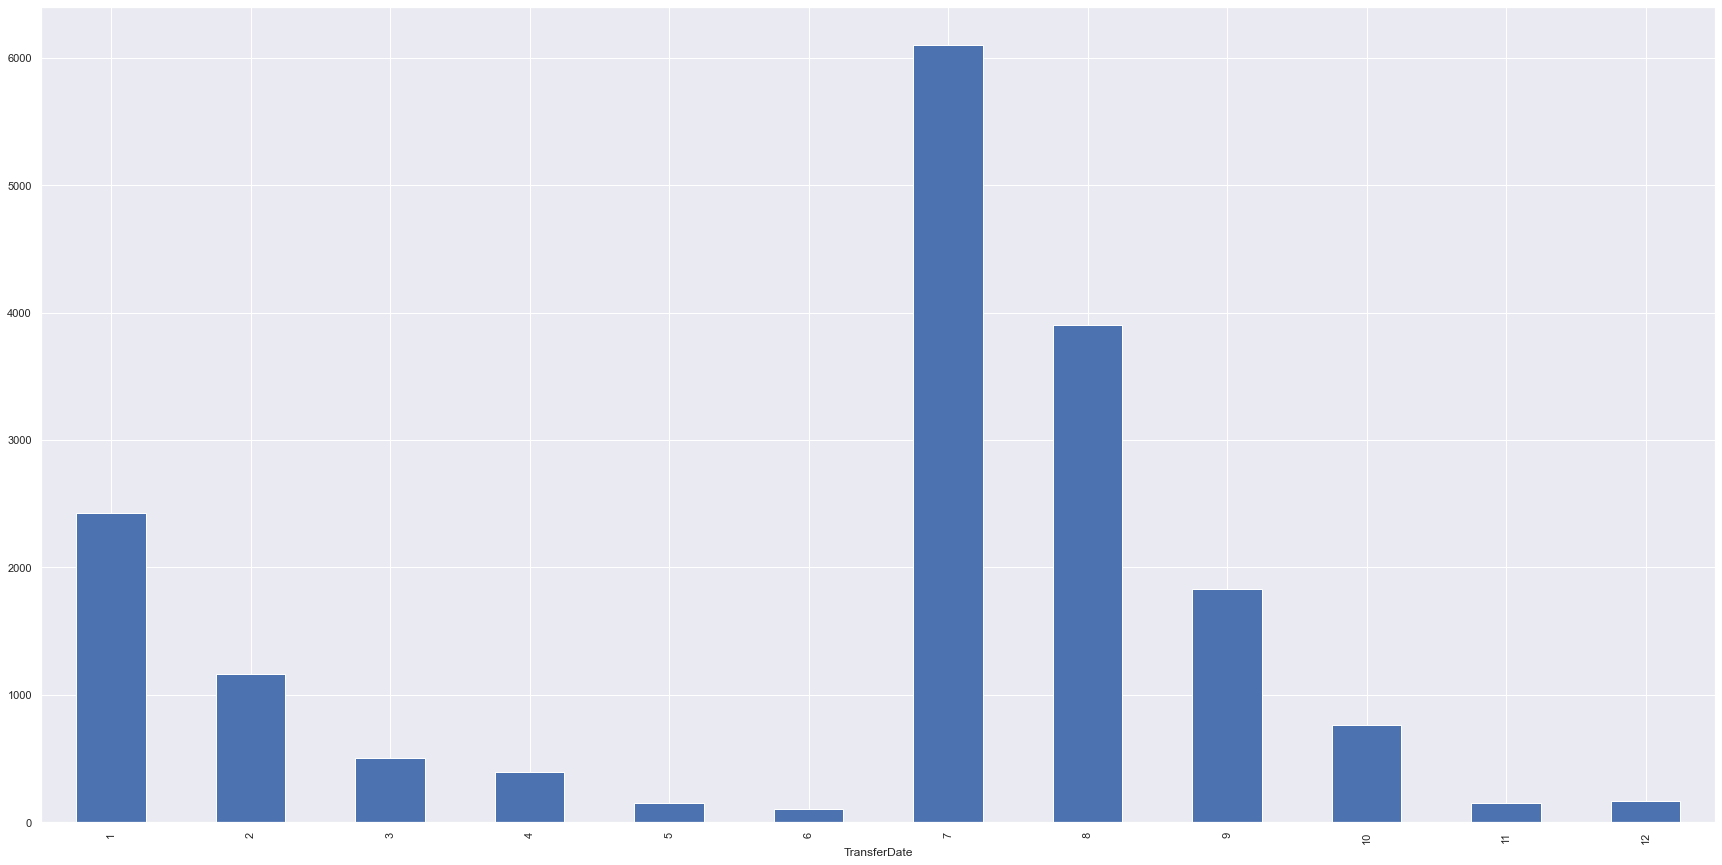

In [ ]:
transfer_df['TransferDate'] = pd.to_datetime(transfer_df['TransferDate'])
transfer_df['TransferDate'].groupby(transfer_df['TransferDate'].dt.month).count().plot(kind="bar")

% wszystkich sprzedanych zawodników w zależności od narodowości ligi:

<BarContainer object of 37 artists>

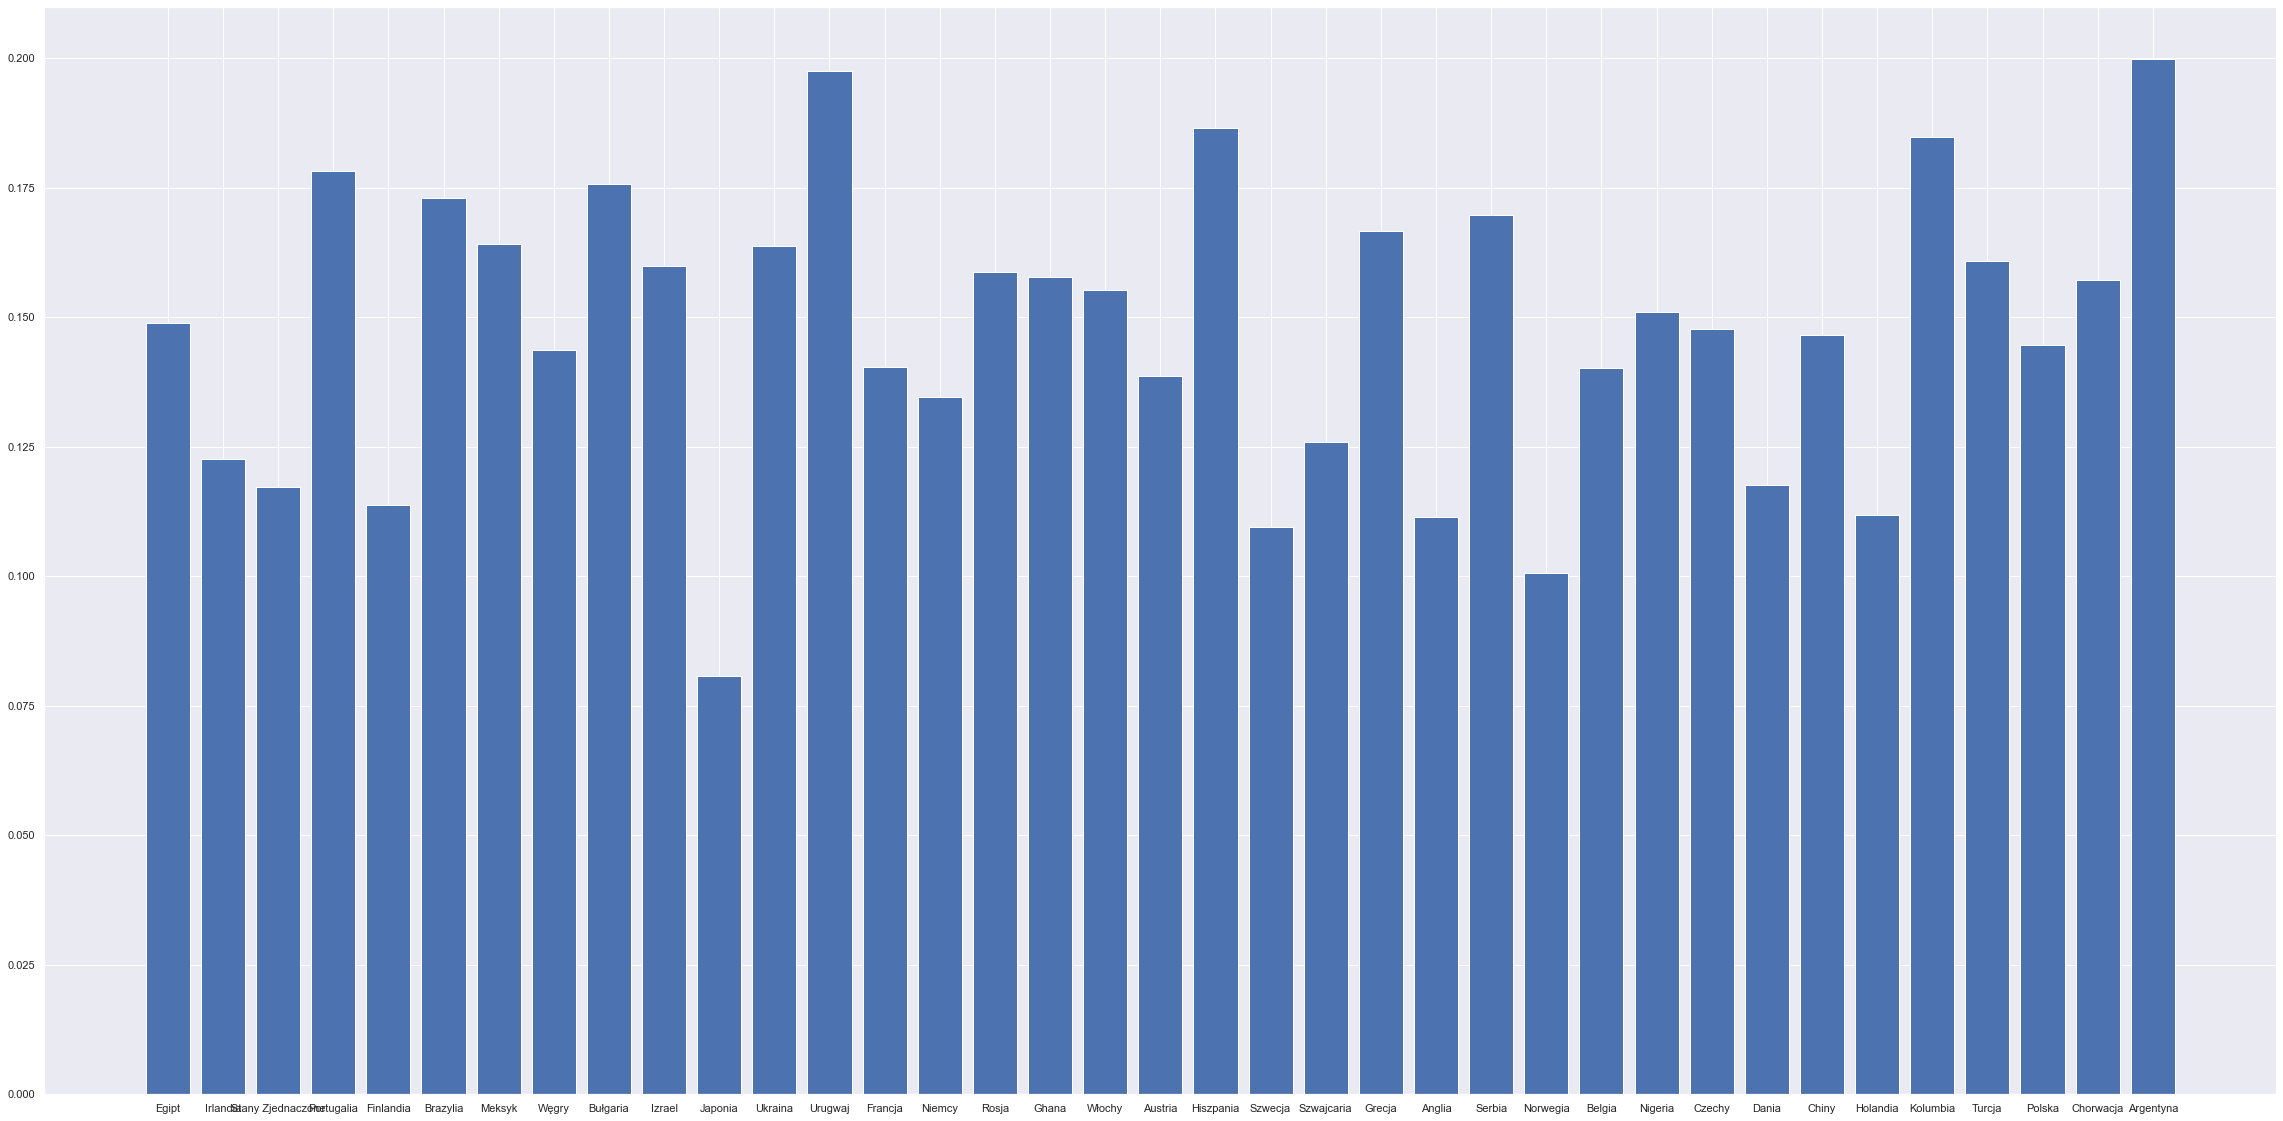

In [ ]:
league_transfers_amount = []
for league in league_unique_list:
    league_transfers_amount.append(len(transfer_df.loc[
        (transfer_df["ClubAssignedLeagueNationality"] == league) & 
        (transfer_df["Bought/Sold"] == "Kupiony")]))
plt.figure(figsize=(40,20))
plt.bar(display_nationalities,nationality_cards_per_match)
    

TOP 20 zawodników najczęściej zmieniających kluby:

In [ ]:
def sort_values(val):
    return val[1]
transfers_counter = statistics.Counter(transfer_df["Player"])
data_items = transfers_counter.items()
data_list = list(data_items)
data_list.sort(key=sort_values,reverse=True)
transfers_counter = pd.DataFrame(data_list)
display(transfers_counter.head(20))

,0,1
0,Rogério,13
1,Josef Bursik,13
2,Diego Rodríguez,11
3,Richard,11
4,Paul Smyth,10
5,Viktor Gyökeres,9
6,Rafinha,9
7,Lucca,9
8,Lucas Villarruel,9
9,Jaroslaw Jach,8


Liczba strzelonych goli w zależności od wzrostu zawodnika

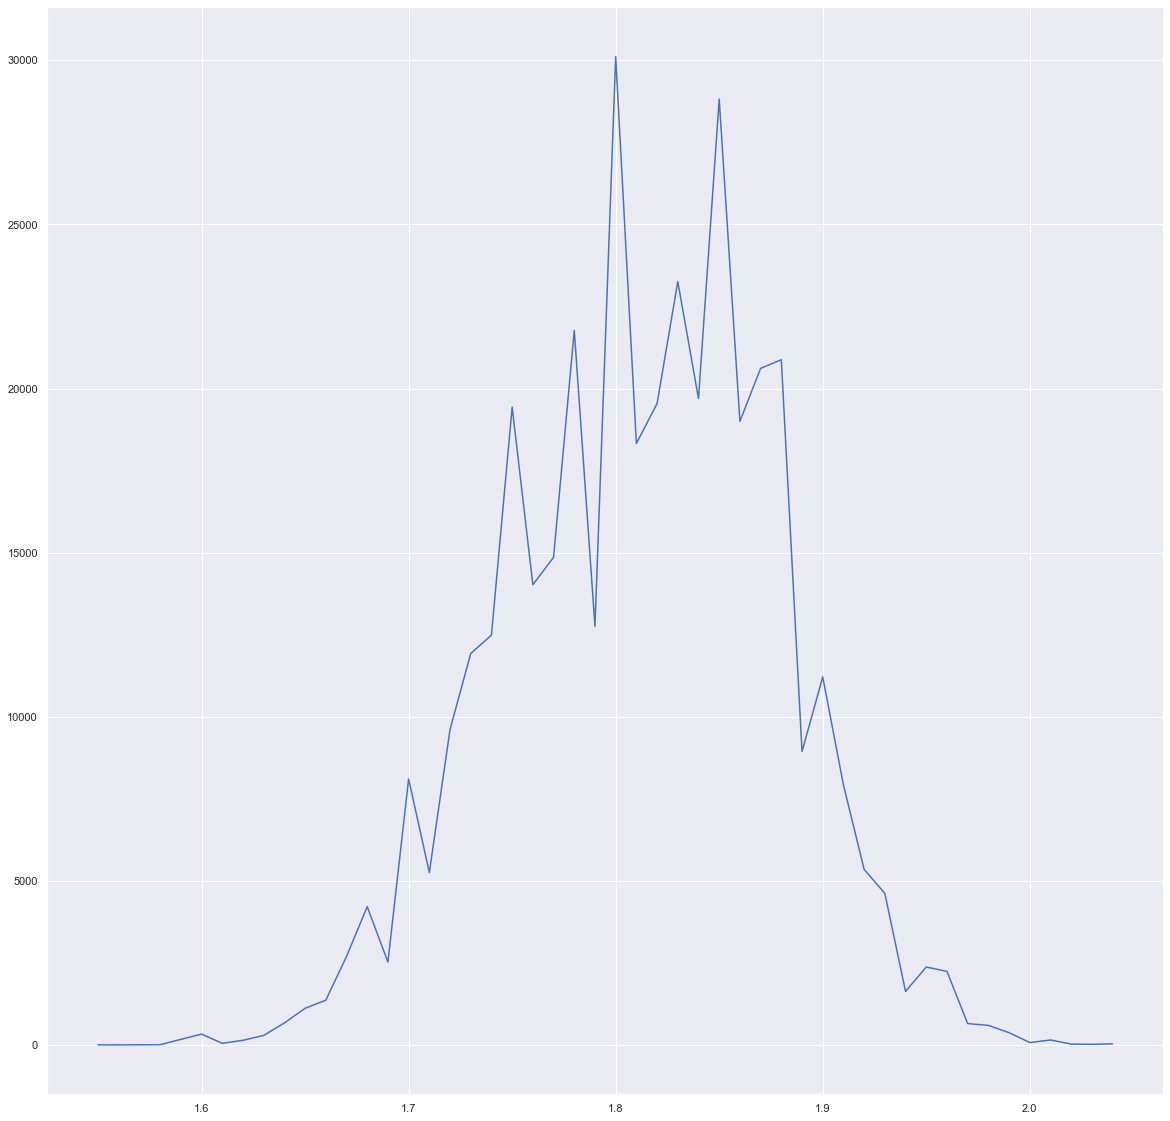

In [ ]:

amout_of_goals = []
height_unique_list = []
for height in transfer_df["PlayerHeight"]:
    if height not in height_unique_list:
        height_unique_list.append(height)
height_unique_list.sort()
for height in height_unique_list:
        goals_sum = 0
        goals = transfer_df.loc[(transfer_df["PlayerHeight"] == height)]['PlayerGoals']
        for value in goals:
            converted_value = int(value)
            goals_sum= goals_sum + converted_value
        amout_of_goals.append(goals_sum)
plt.figure(figsize=(20,20))
plt.plot(height_unique_list,amout_of_goals)

Wartość rynkowa zawodnika w zależności od liczby zagranych meczy

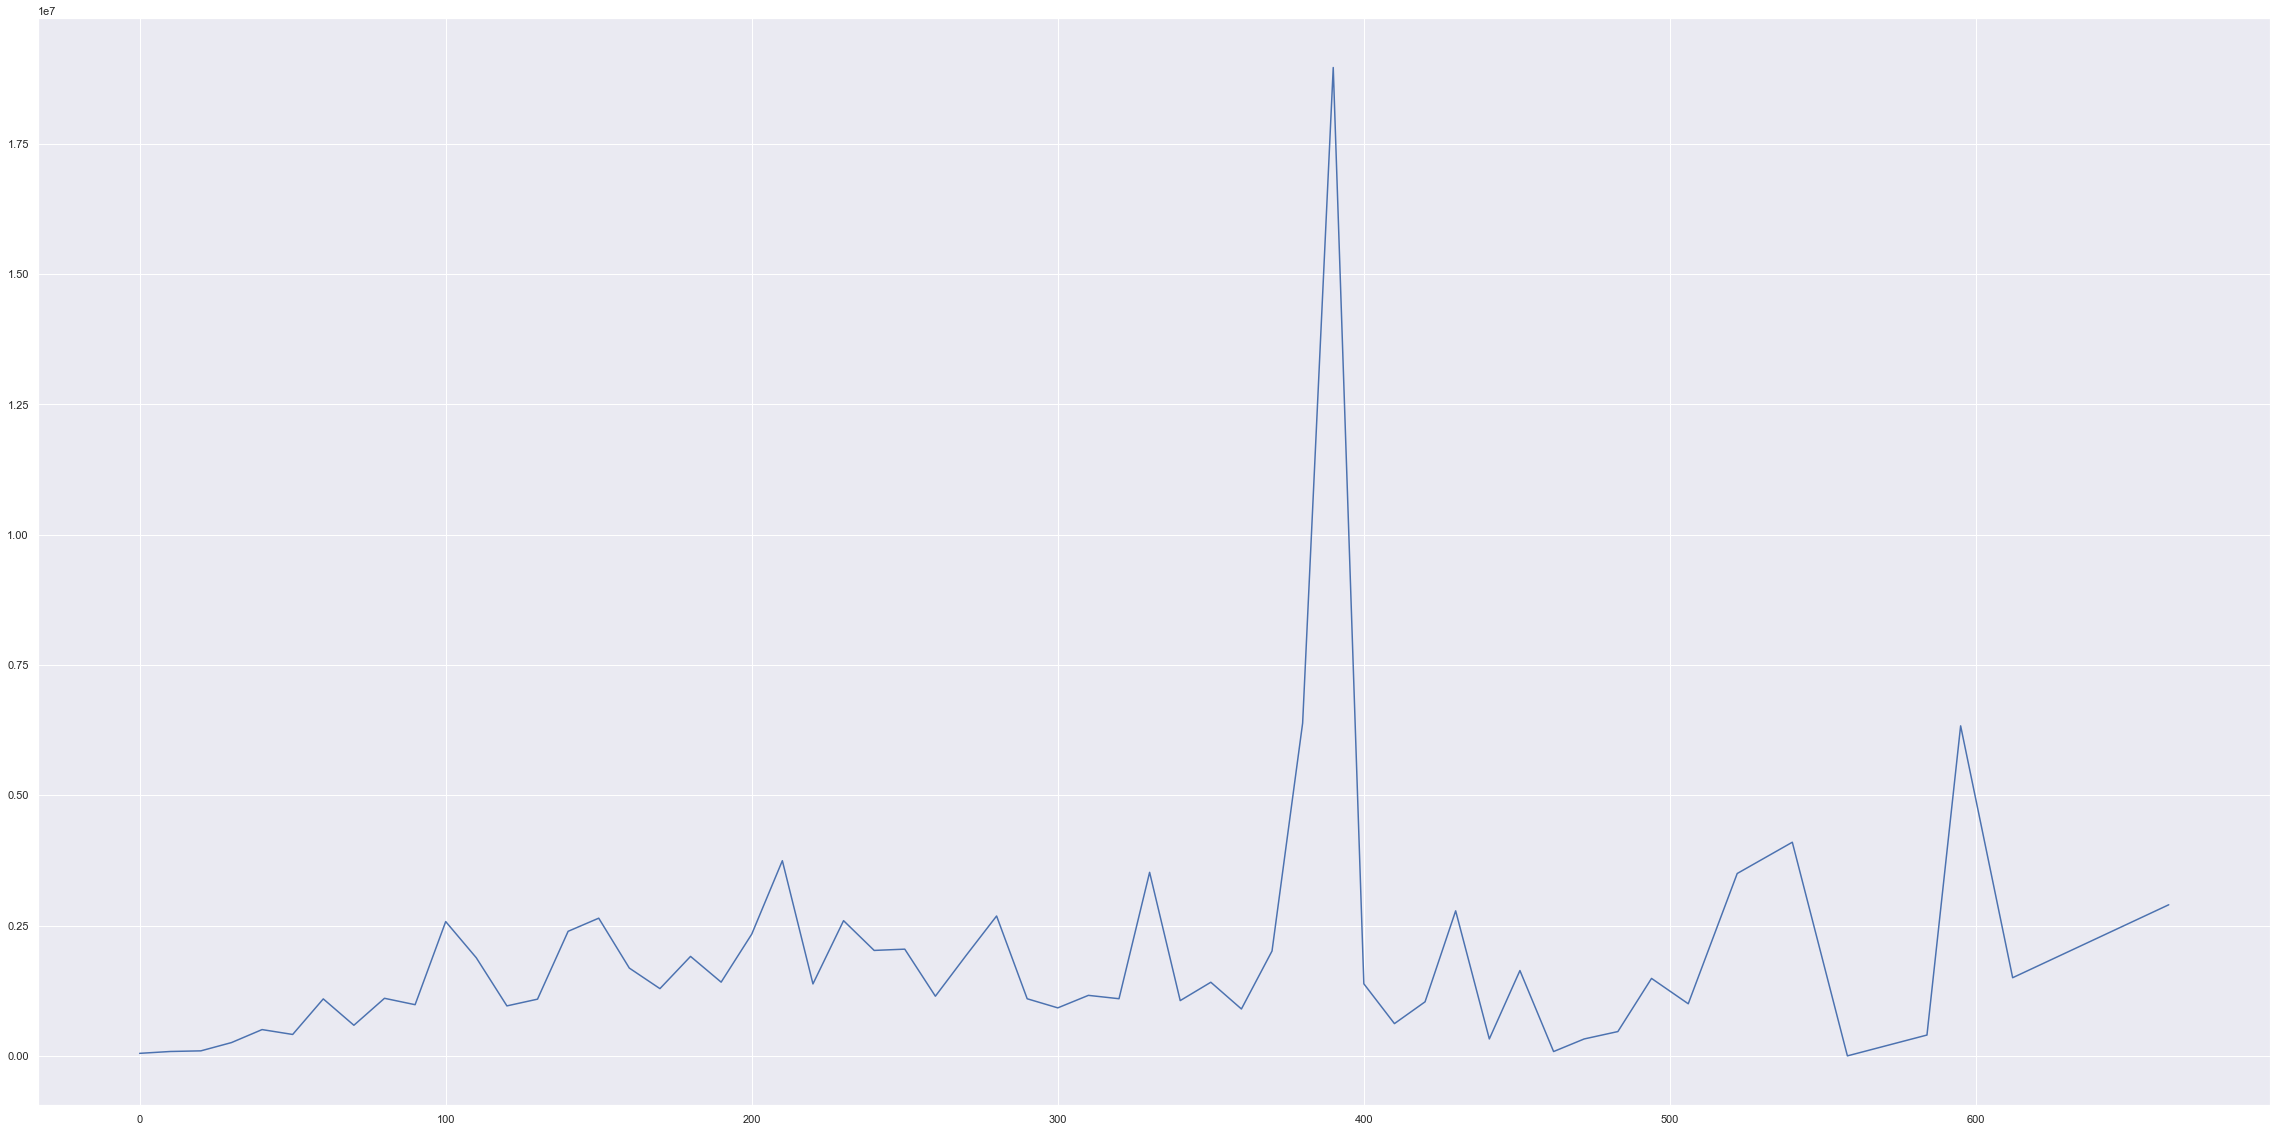

In [77]:
player_value_sum = []
games_played_unique_list = []
games_played = transfer_df['PlayerMatchesPlayed'].tolist()
games_played.sort()
for games in games_played:
    if games not in games_played_unique_list:
        games_played_unique_list.append(games)


for games in games_played_unique_list:
        value_sum = 0
        values = transfer_df.loc[(transfer_df["PlayerMatchesPlayed"] == games)]['PlayerMarketValue']
        for value in values:
            converted_value = int(value)
            value_sum= value_sum + converted_value
        player_value_sum.append(value_sum)
amount_of_players = []
for games in games_played_unique_list:
    players = transfer_df.loc[(transfer_df["PlayerMatchesPlayed"] == games)].count()[0]
    amount_of_players.append(players)
mean_value = [i / j for i, j in zip(player_value_sum, amount_of_players)]
    
x = mean_value[::10]
y = games_played_unique_list[::10]
plt.figure(figsize=(40,20))
plt.plot(y,x)

Wartość rynkowa zawodnika w zależności od wieku (mediana wartości)

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


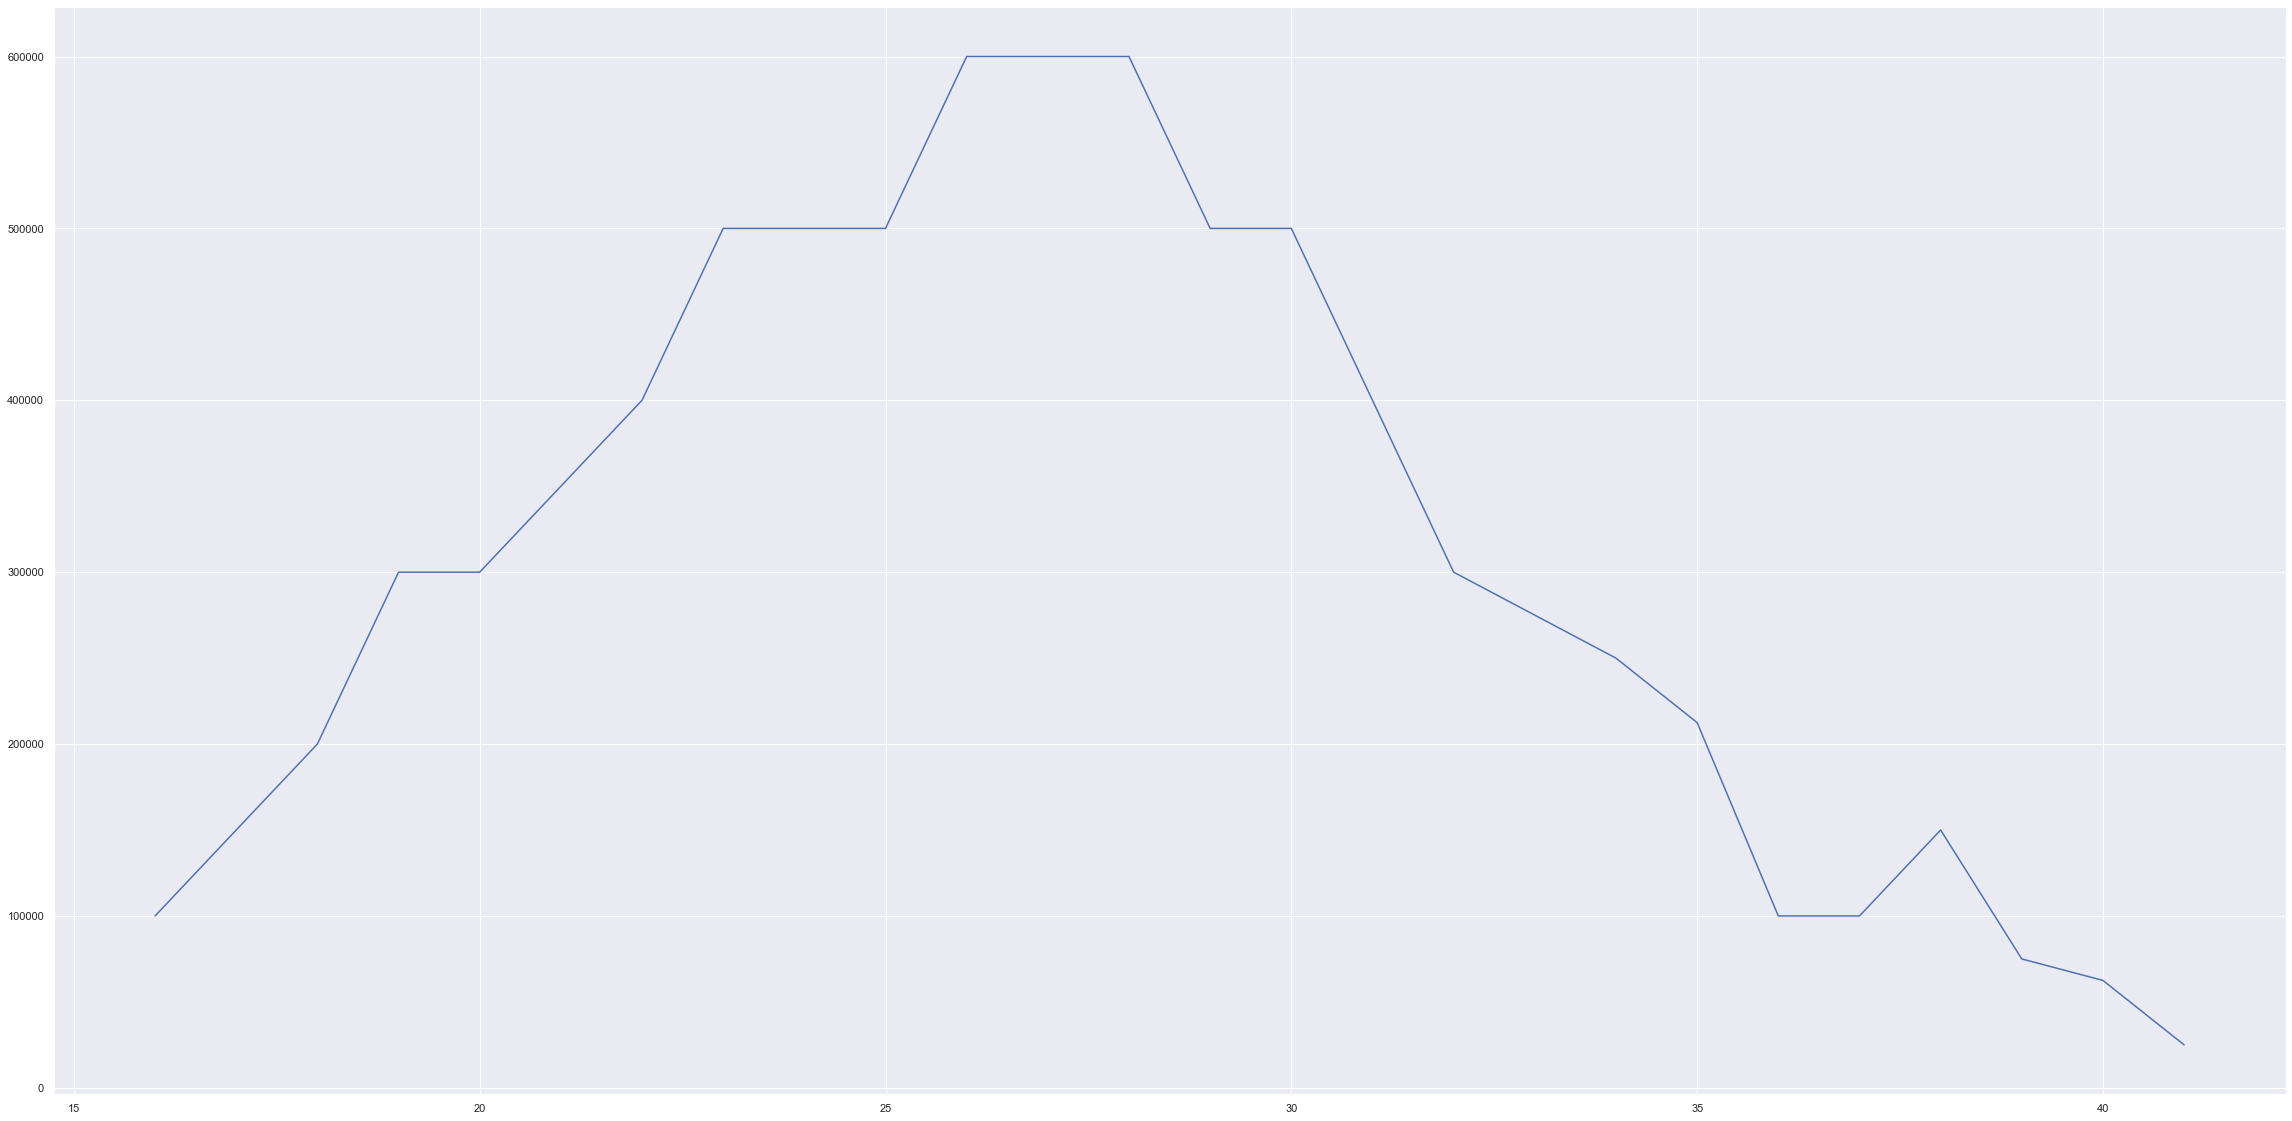

In [95]:
player_value_sum = []
age_unique_list = []
player_ages = transfer_df['PlayerAge'].tolist()

player_ages.sort()
for age in player_ages:
    if age not in age_unique_list and age > 15:
        age_unique_list.append(age)
print(age_unique_list)
for age in age_unique_list:
        value_sum = 0
        values = transfer_df.loc[(transfer_df["PlayerAge"] == age)]['PlayerMarketValue']
        player_value_sum.append(statistics.median(values))


plt.figure(figsize=(40,20))
plt.plot(age_unique_list,player_value_sum)



Wartość rynkowa zawodnika w zależności od wieku (średnia wartość)

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
[18075000, 523635000, 657760000, 1538955000, 2562810000, 3048720000, 2968775000, 3766875000, 3274295000, 2507250000, 2170195000, 2591984998, 1696390000, 1244540000, 729850000, 601345000, 345995000, 225350000, 83310000, 46225000, 12095000, 7185000, 5000000, 1000000, 350000, 25000]


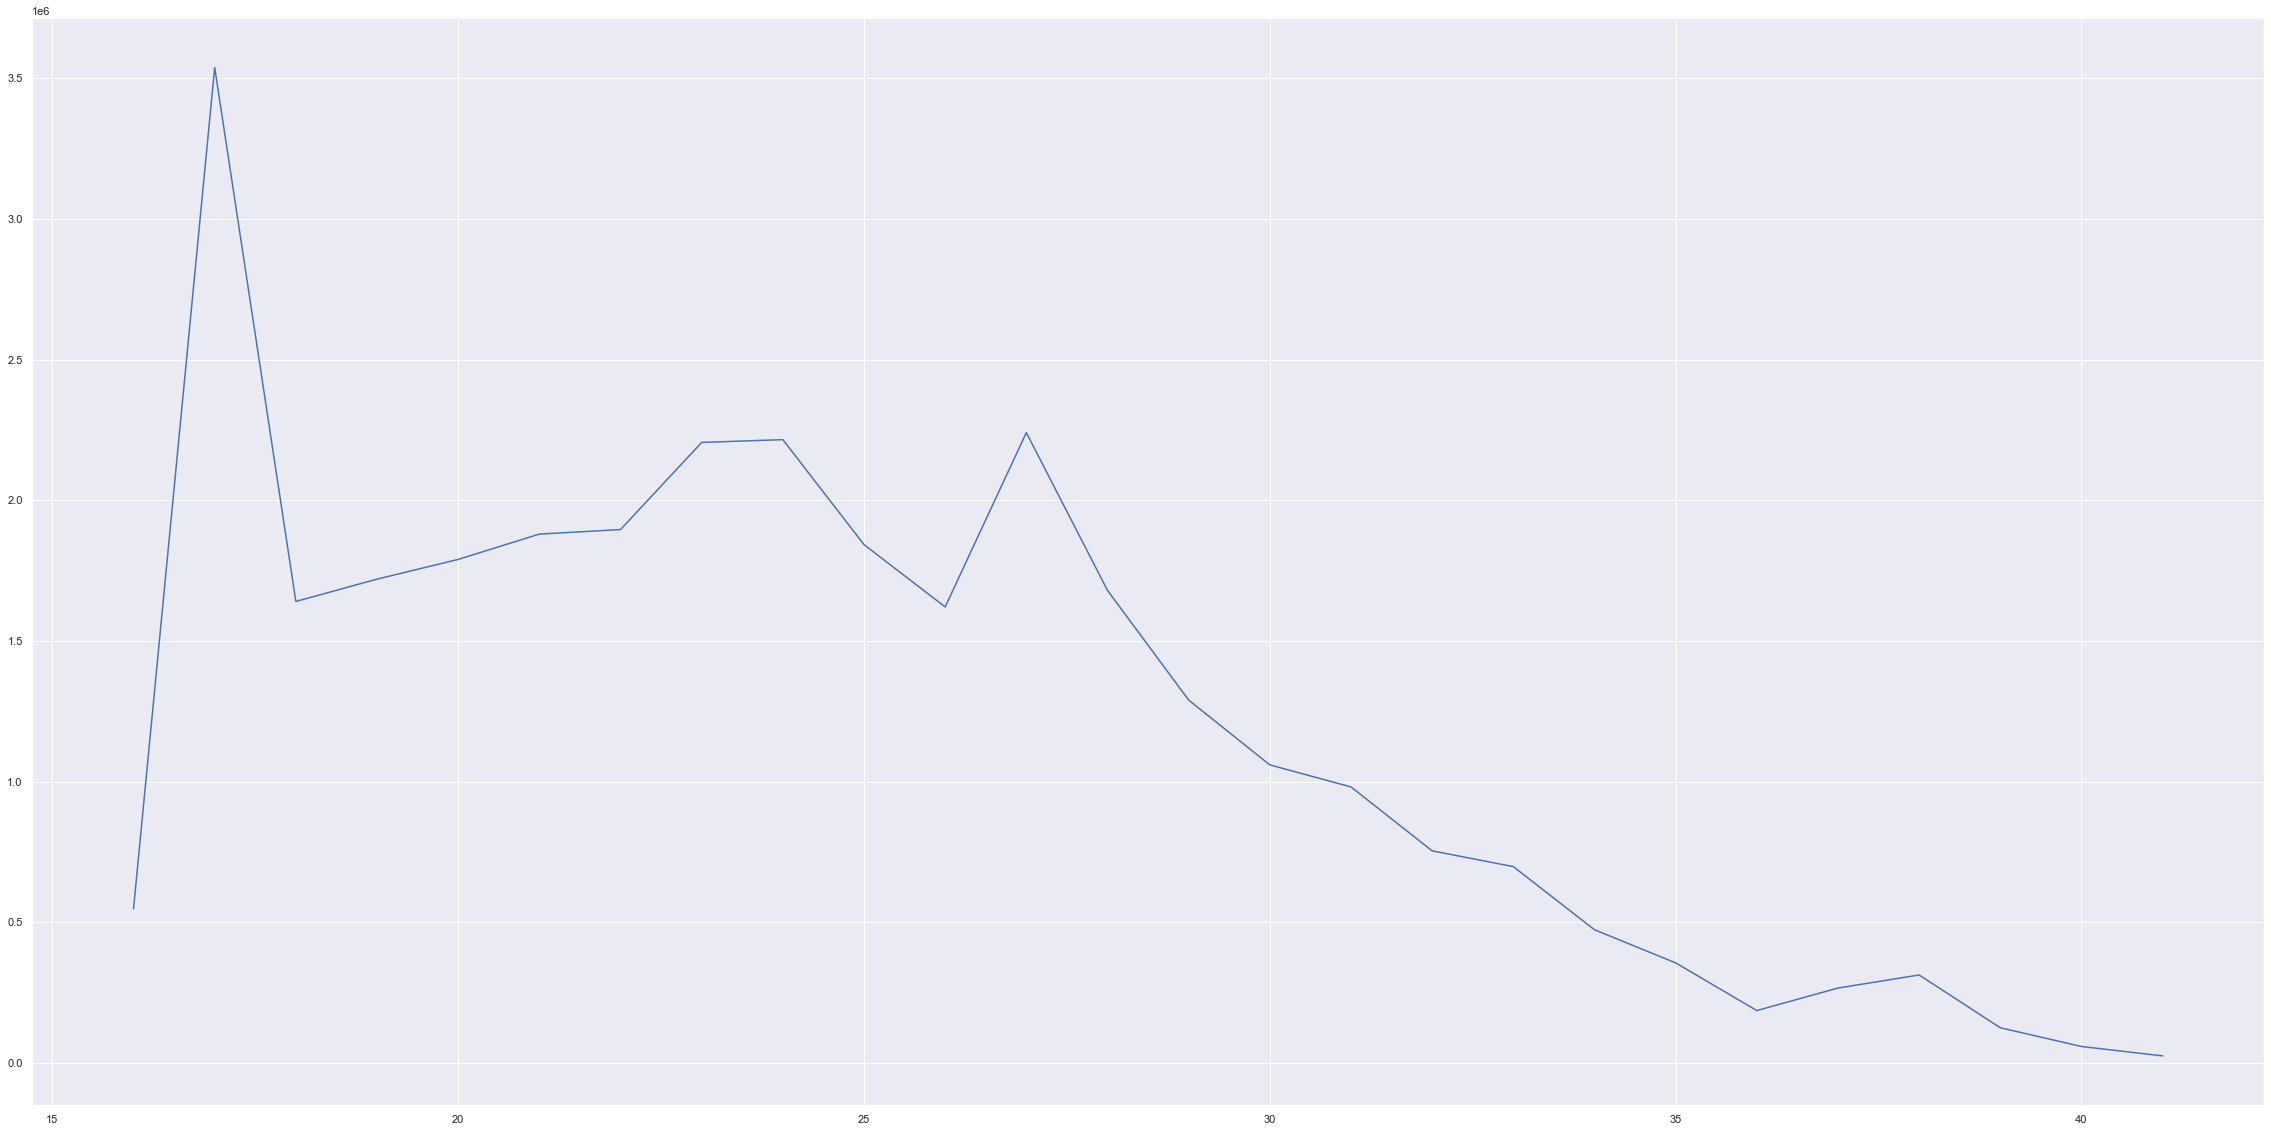

In [93]:
player_value_sum = []
age_unique_list = []
player_ages = transfer_df['PlayerAge'].tolist()

player_ages.sort()
for age in player_ages:
    if age not in age_unique_list and age > 15:
        age_unique_list.append(age)
print(age_unique_list)
for age in age_unique_list:
        value_sum = 0
        values = transfer_df.loc[(transfer_df["PlayerAge"] == age)]['PlayerMarketValue']
        for value in values:
            converted_value = int(value)
            value_sum= value_sum + converted_value
        player_value_sum.append(value_sum)
print(player_value_sum)

amount_of_players = []
for age in age_unique_list:
    players = transfer_df.loc[(transfer_df["PlayerAge"] == age)].count()[0]
    amount_of_players.append(players)
mean_value = [i / j for i, j in zip(player_value_sum, amount_of_players)]
plt.figure(figsize=(40,20))
plt.plot(age_unique_list,mean_value)

% strzelonych goli w zależności od wieku

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[14935, 18600, 21209, 26569, 27746, 29441, 32487, 32642, 30592, 31921, 23809, 24592, 23093, 17483, 8518]


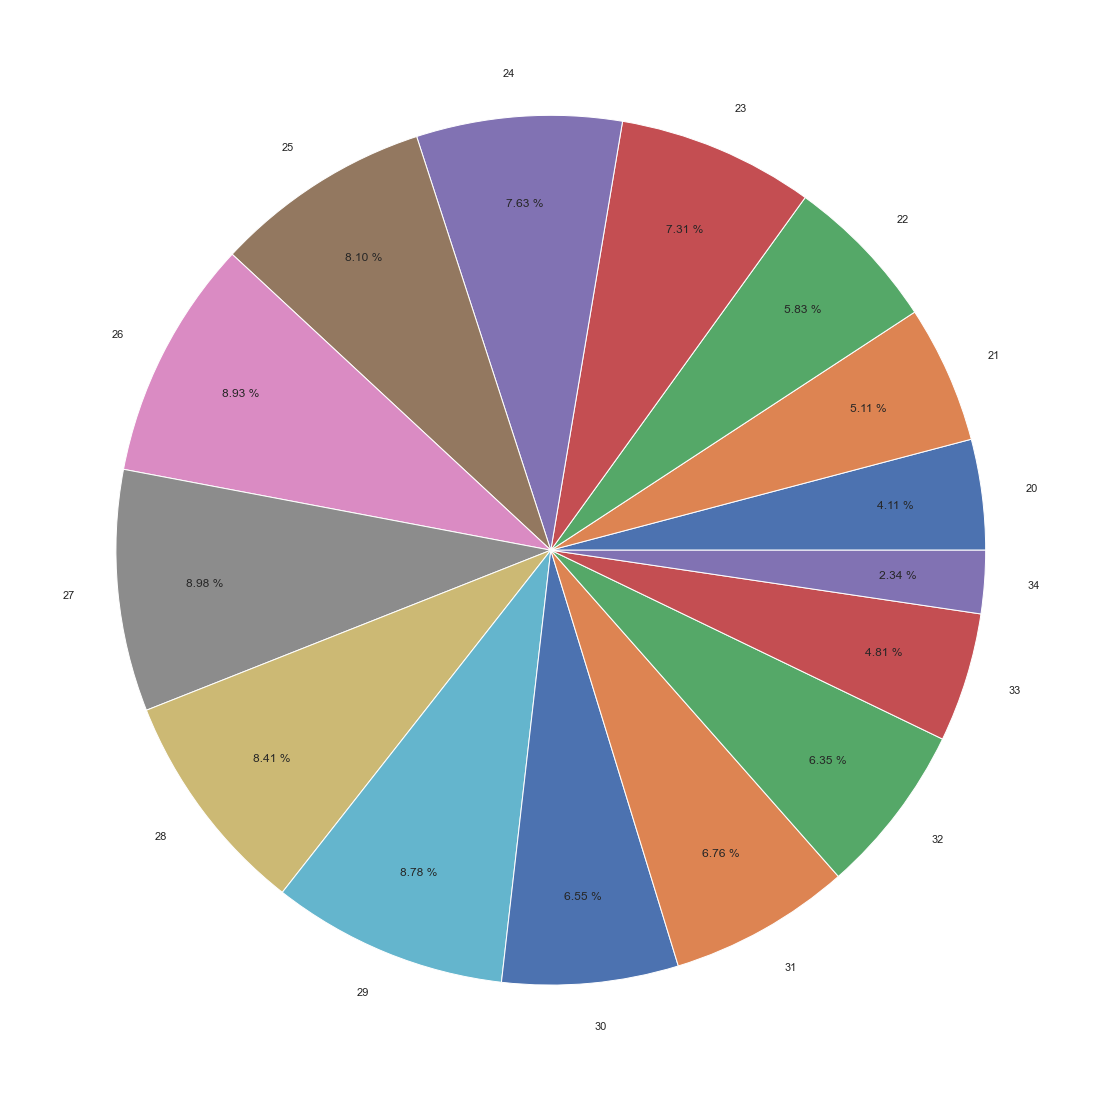

In [98]:
amout_of_goals = []
age_unique_list = []
for x in range(20, 35):
    age_unique_list.append(x)
print(age_unique_list)
for age in age_unique_list:
    goals = transfer_df.loc[(transfer_df['PlayerAge'] == age)]['PlayerGoals']
    goals_sum = 0
    for value in goals:
        converted_value = int(value)
        goals_sum= goals_sum + converted_value
    amout_of_goals.append(goals_sum)
print(amout_of_goals)
plt.figure(figsize=(20,20))

plt.pie(amout_of_goals, labels=age_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.show()

% strzelonych goli w zależności od wieku i ligi

Text(0, 0.5, 'Percentage(%)')

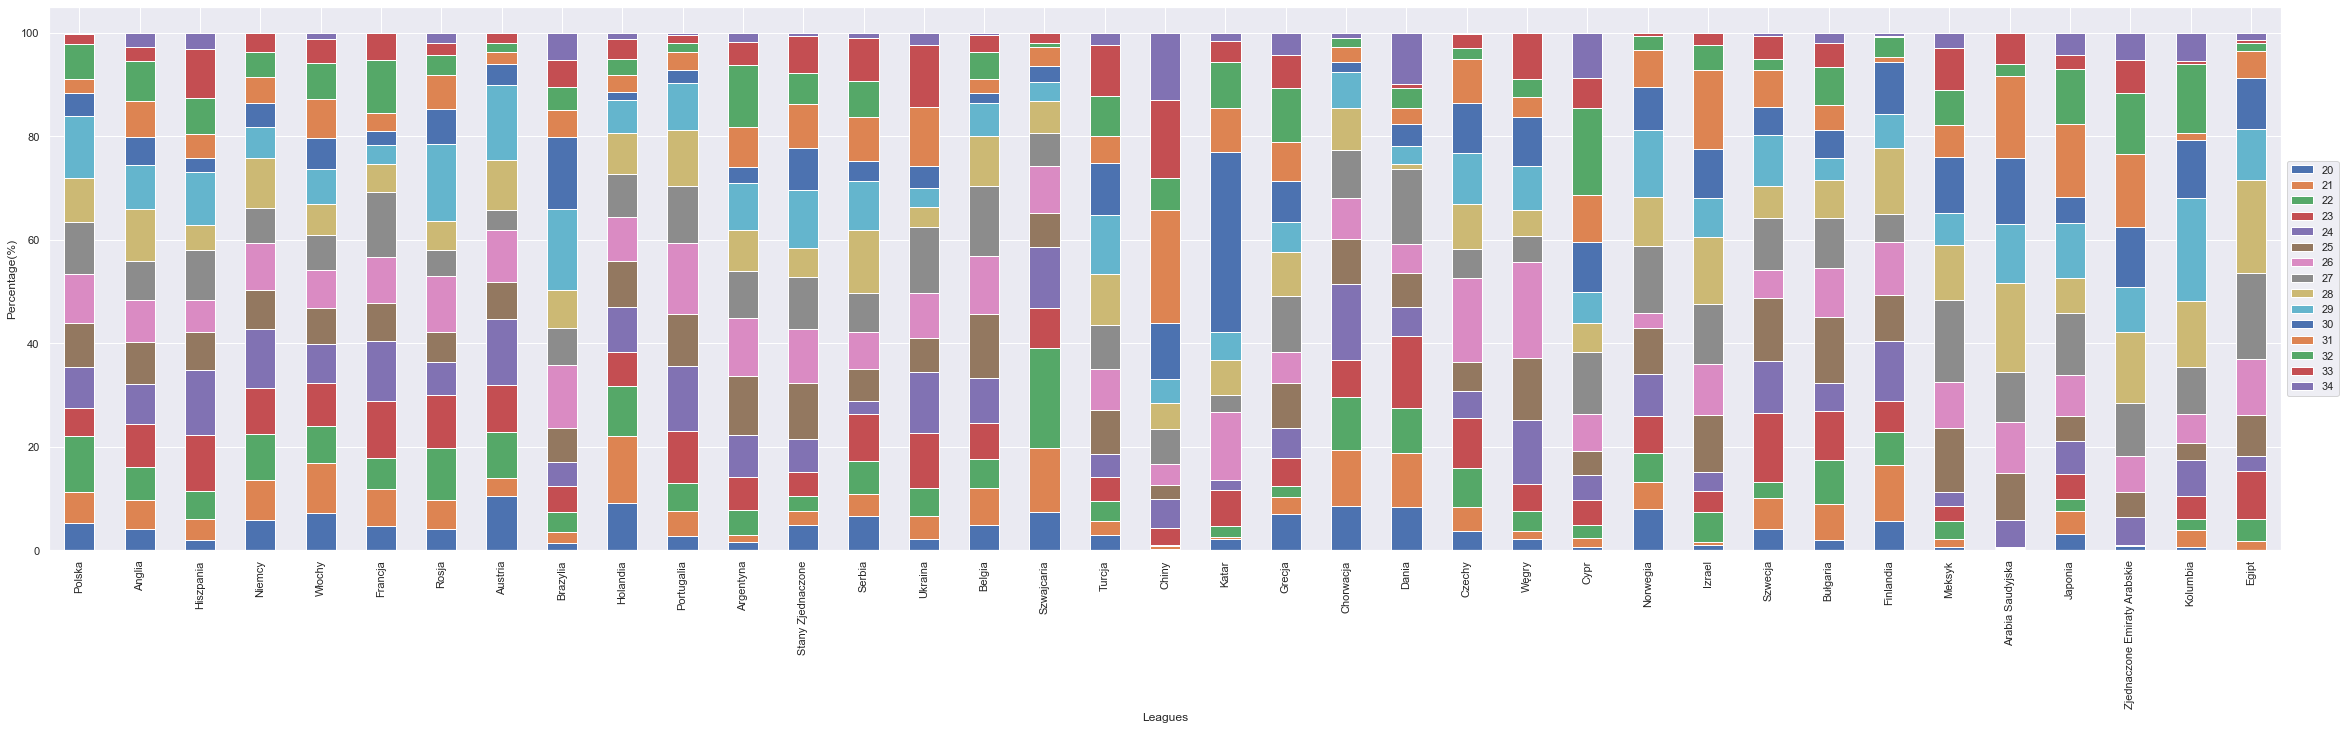

In [99]:
listNumberOfGoals = []
for league in league_unique_list:
    amout_of_goals = []
    for age in age_unique_list:
        goals_sum = 0
        goals = transfer_df.loc[(transfer_df["PlayerAge"] == age) & (transfer_df["ClubLeagueNationality"] == league)]['PlayerGoals']
        for value in goals:
            converted_value = int(value)
            goals_sum= goals_sum + converted_value
        amout_of_goals.append(goals_sum)
    listNumberOfGoals.append(amout_of_goals)
df = pd.DataFrame(columns=age_unique_list, data=listNumberOfGoals, index=league_unique_list)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Leagues")
plt.ylabel("Percentage(%)")

Liczba czerwonych kartek w zależności od ligi

                 Club  ClubLeagueLevel ClubLeagueNationality             Player  PlayerAge  PlayerHeight TransferDate  PlayerMatchesPlayed  PlayerGoals  PlayerAssists  PlayerOwnGoals  PlayerSubstitutionIn  PlayerSubstitutionOut  PlayerYellowCards  PlayerSecondYellowCards  PlayerRedCards  PlayerMinutesPlayed  \
0      Legia Warszawa                1                Polska        Ernest Muci         19          1.80   2021-02-23                   94           24              6               0                    41                     26                  6                        0               0                 5004   
1      Legia Warszawa                1                Polska    Josip Juranovic         24          1.73   2021-08-21                  224            8             23               3                    23                     12                 18                        0               1                18428   
2      Legia Warszawa                1                Polska  Ja

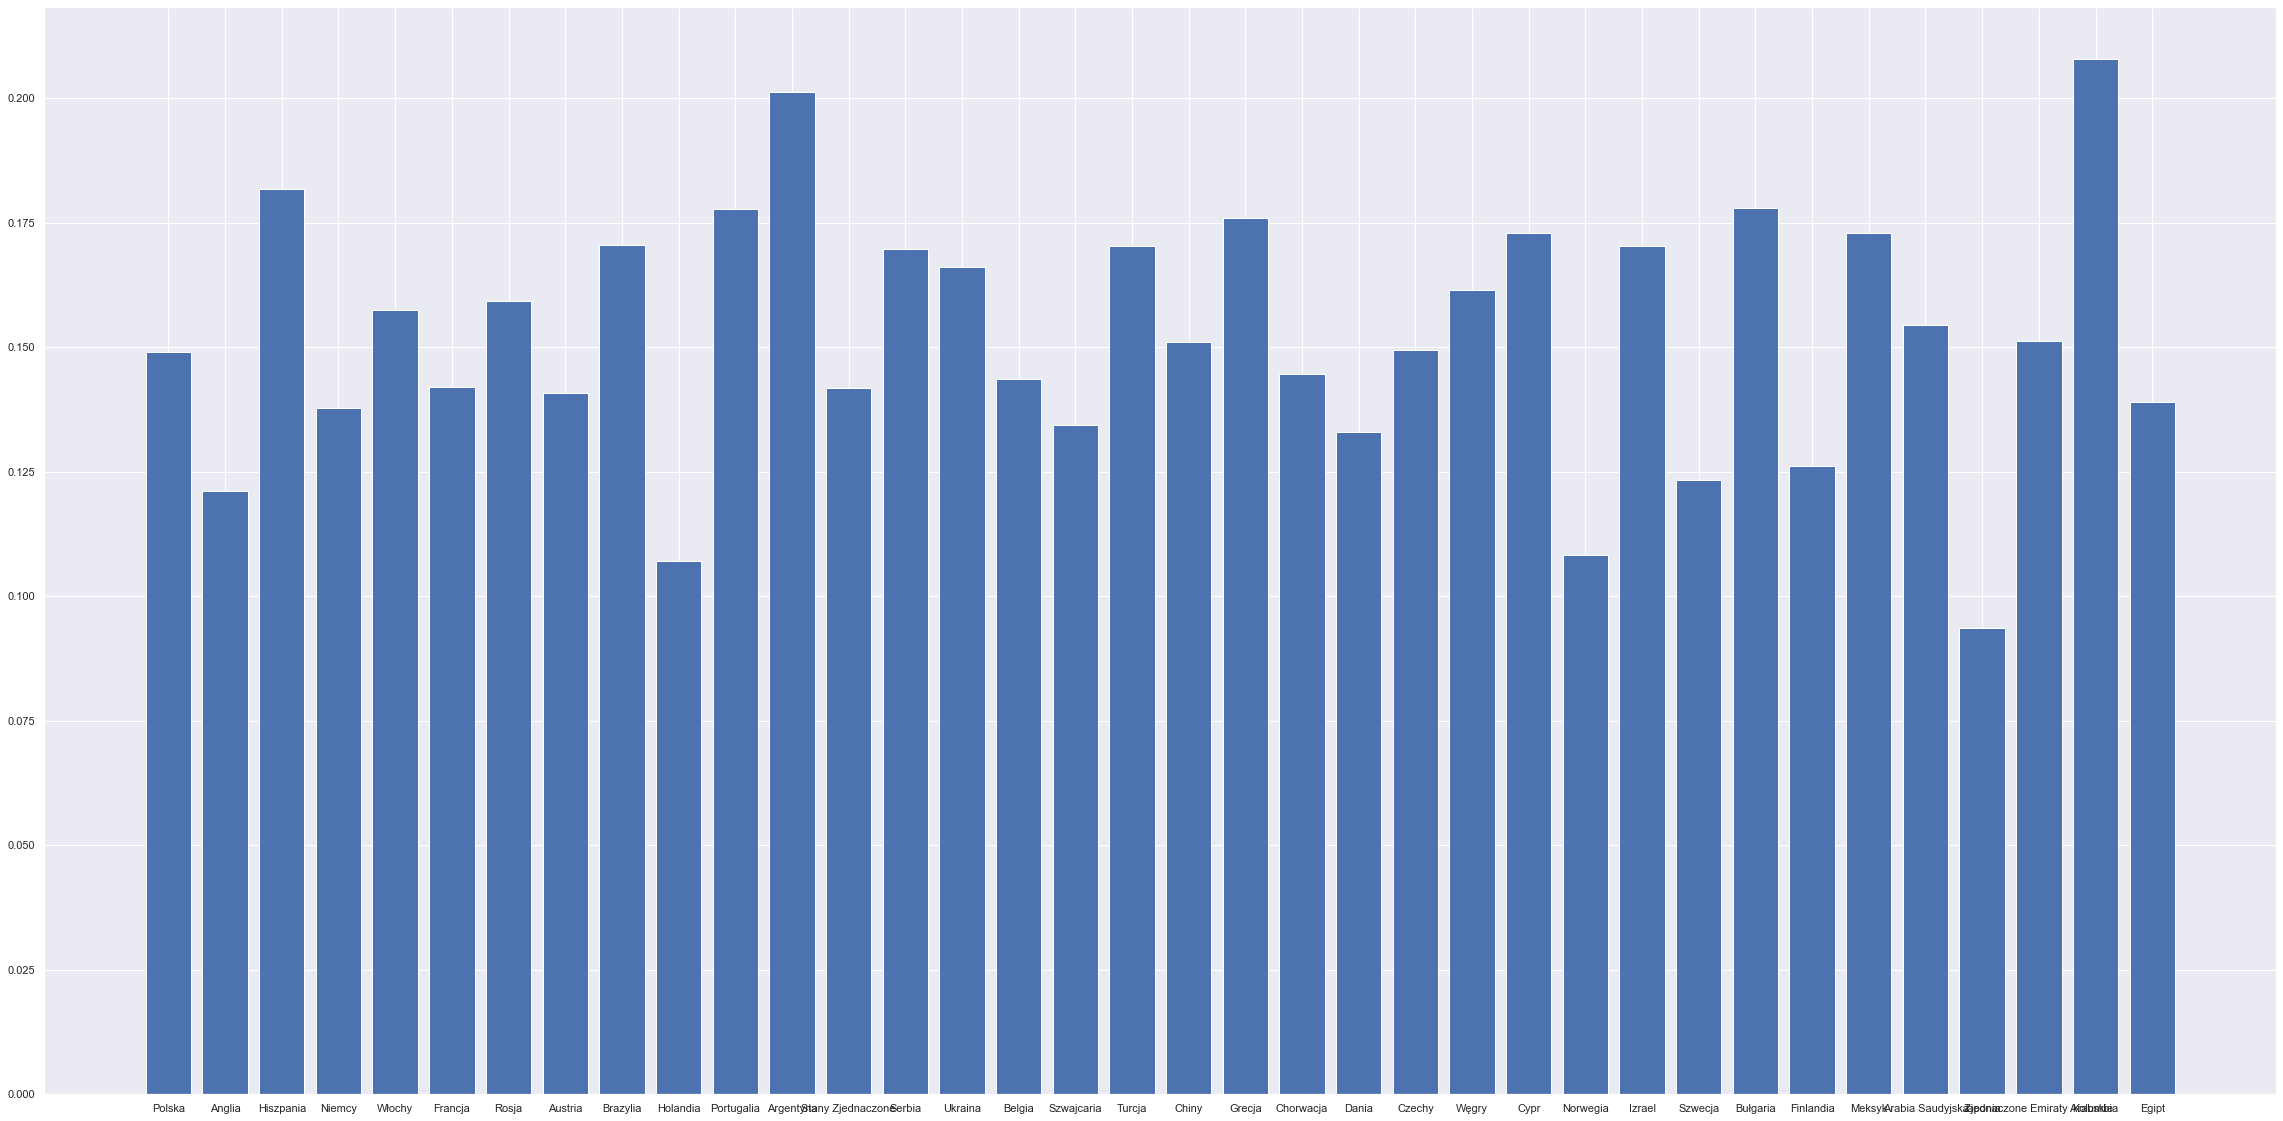

In [105]:
league_unique_list = []
for league in transfer_df["ClubLeagueNationality"]:
    if league not in league_unique_list:
        league_unique_list.append(league)
league_cards_per_match = []
display_leagues = []
for league in league_unique_list:
    league_players = transfer_df[transfer_df["ClubLeagueNationality"] == league]
    cards_ratio = [i / j if j > 100 else -1 for i, j in zip(league_players["PlayerYellowCards"] + league_players["PlayerSecondYellowCards"] + 3*league_players["PlayerRedCards"], league_players["PlayerMatchesPlayed"])]
    cards_ratio = [card_ratio for card_ratio in cards_ratio if card_ratio >= 0]
    if(len(cards_ratio) >= 100):
        display_leagues.append(league)
        league_cards_per_match.append(statistics.mean(cards_ratio))
plt.figure(figsize=(40,20))
plt.bar(display_leagues,league_cards_per_match)